In [1]:
#initial imports
from collections import Counter
from IPython.display import clear_output
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns
import sys
import time
#BeautifulSoup
from bs4 import BeautifulSoup
#gensim
import bz2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing
import gensim
from gensim import corpora
from gensim import models
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from gensim.models import Phrases
#NLTK
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords # Import the stop word list
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn import linear_model
#SpaCy
import spacy
spacy.load('en')
from spacy.lang.en import English

2019-02-24 15:50:16,501 : INFO : 'pattern' package not found; tag filters are not available for English


3.1.0


/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



In [2]:
df = pd.read_csv('~/Desktop/Final Capstone/jobs_db.csv')
pd.set_option('display.max_colwidth', -1)

In [3]:
df.head(10)

id  \
0  15   
1  16   
2  17   
3  18   
4  19   
5  20   
6  21   
7  22   
8  23   
9  24   

                                                                                                                                                                                                 title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                                                                  
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                                                                  
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                                                                
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                                                                    
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning</h3>   
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer, Natural Language Processing /NLP</h3>                                                                  
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing and Machine Learning Engineer</h3>                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Turn our df into X, for later use with modelling, train_test_split and getting a y column.

In [4]:
X = df

## EDA and Data Cleaning

Since we web scraped, the text is in pretty raw format.  To get it into useable shape, I plan to get rid of the html code before tokenizing and lemmatizing it. I'll also check for duplicates, and remove any to keep the results as clean as possible.  From here, it will be easier to determine what words can be added as stop words, or, are meaningful to the analysis in some way.

In [5]:
#Let's check for unique job descriptions. 
#If we drop some duplicates, we'll run our cleaning on less data, which is faster.
X.nunique()

id                 7882
title              3464
job_description    4334
job_class          9   
dtype: int64

In [6]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Computer Vision',
       'Text Analytics', 'Apache Spark', 'Speech Recognition',
       'Neural Networks'], dtype=object)

In [7]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Pattern Recognition            792
Text Analytics                 795
Neural Networks                827
Computer Vision                829
Natural Language Processing    881
Apache Spark                   919
Machine Learning               934
Speech Recognition             944
Text Mining                    961
Name: job_description, dtype: int64

In [8]:
#It stands to reason that we would want to keep the unique job descriptions, because titles like "Data Scientist"
#are broadly used in the field and not necessarily problematic for the scope of this project.
X = X.drop_duplicates(['job_description'], keep = 'last')

In [9]:
#Let's check to make sure we dropped what we had intended.
X.nunique()

id                 4334
title              3431
job_description    4334
job_class          9   
dtype: int64

In [10]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Computer Vision                633
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

The sum of our "female dominated fields is 1,500 which is 34.6% of our dataset. I'm going to drop rows that are Computer Vision job descriptions.  This should help even out the imbalance, and that particular field was the most "gender-balanced" out of the male-dominated job descriptions we have above.

In [11]:
#Dropping Computer Vision
X = X[X.job_class != 'Computer Vision']

In [12]:
X.reset_index(drop=True, inplace=True)

In [13]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

Although we lost a large portion of the dataset due to duplicates, it's important to prioritize quality over quantity. I evaluated the dataset to ensure that there would not be a class imbalance problem.  Now, our female-dominated fields comprise 40% of the job descriptions, this is pretty good considering we're working with scraped data. So, we'll proceed with cleaning up the dataset, so we can put it into BoW and Tf-Idf and then run some models on it!

In [15]:
#A quick view of the dataset to see what we might need to clean.
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Lots of HTML script here, as expected. Let's get some of that cleaned up before we tokenize.

In [16]:
X['job_description'] = X['job_description'].replace(r'div class="jobsearch-JobComponent-description icl-u-xs-mt--md"><div></div><div><div><div><b>', '', regex=True).replace(r'</div', '', regex=True)

In [17]:
X['title'] = X['title'].replace(r'<h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">', '', regex=True).replace(r'</h3>', '', regex=True)

In [18]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                     title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Much better, our job titles look really nice at this point. Onward!

In [19]:
X['job_description'] = X['job_description'].replace(r'<div class="jobsearch-JobComponent-description icl-u-xs-mt--md">', '', regex=True)


In [20]:
X.sample(10)

id                                                         title  \
833   2100  Senior Signal Analysis Engineer                                
3456  7637  Intern - Fellow (Image Analytics) Summer 2019                  
1366  3337  NLP/ Machine Learning R&amp;D Engineer                         
2645  6512  Disability Access Services and Tutoring Programs Coordinator   
333   647   NLP Engineer                                                   
539   965   innovationOchsner (iO) - Data Scientist - Benson Tower         
336   652   Data Scientist - You Make Data Sing                            
2652  6520  Enterprise Data Governance Lead                                
234   483   Accounting Internship                                          
926   2219  Data Scientist Senior                                          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [21]:
len(X)

3701

In [22]:
#This will get rid of most of the html markers that are within <>
def clean_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [23]:
start = time.time()
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_html(X['job_description'][i])
end = time.time()
print("Done in", end - start, "seconds")

Done in 7.927809953689575 seconds


In [24]:
X.sample(25)

id  \
1162  3020   
1575  4423   
954   2260   
2029  5694   
2834  6757   
2929  6900   
2562  6390   
1337  3292   
3520  7716   
1332  3285   
1729  4797   
2339  6081   
3568  7775   
2563  6391   
3271  7387   
1421  3409   
1617  4479   
68    176    
1222  3124   
1592  4446   
1993  5637   
2412  6184   
2627  6485   
3051  7100   
861   2137   

                                                                                      title  \
1162  Associate Data Analyst                                                                  
1575  Consumer Insights Manager - Analytics                                                   
954   Sr. Data Scientist                                                                      
2029  Big Data &amp; Cloud Data Engineer                                                      
2834  Human Resource - Compensation/Total Rewards Manager                                     
2929  Advanced Natural Language Computer Scientist                                            
2562  Record Integrity Auditor                                                                
1337  STATISTICIAN                                                                            
3520  Research Intern -- DiDi Labs (Los Angeles)                                              
1332  Data Scientist – Natural Language Processing and Machine Learning                       
1729  Full Stack Web Developer                                                                
2339  Senior Manager, Data Engineering                                                        
3568  Global Data Science Instructor                                                          
2563  Cold Production Cook                                                                    
3271  GEOINT Product Quality Analyst, Junior                                                  
1421  Office Manager                                                                          
1617  Senior Data Scientist, Data Sciences and Advanced Analytics-Medical Device Technology   
68    Software Engineer - Natural Language Processing                                         
1222  Machine Learning / Artificial Intelligence Scientist                                    
1592  Director Customer Experience Analytics                                                  
1993  Hadoop Developer                                                                        
2412  INTELLIGENCE ANALYST 1-020619-173943                                                    
2627  SENIOR CLERK - 64068286                                                                 
3051  Data Scientist, Advanced Data Analytics                                                 
861   Data Scientist                                                                          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

That worked like a charm! Let's continue cleaning.

In [25]:
X['job_description'] = X['job_description'].replace(r'\n', ' ', regex=True)

In [26]:
X.sample(25)

id                                                           title  \
2059  5729  Mobile Architect                                                 
3456  7637  Intern - Fellow (Image Analytics) Summer 2019                    
3055  7105  Associate Data Scientist                                         
3547  7750  Digital Marketing Associate or Intern                            
423   781   Data Scientist                                                   
1584  4437  EHS Analytics Intern                                             
2460  6254  AI P&amp;R Speech Scientist &amp; Engineer – Language Modeling   
568   1014  Data Analytics Engineer                                          
2578  6414  The Alley Busser                                                 
1838  5339  Software Engineer (Backend)                                      
3206  7288  Director of Data Science                                         
87    213   Inside Sales Rep                                                 
820   2082  AI Application Developer                                         
696   1895  Field Service Representative - South Carolina Region             
2168  5863  Senior Ruby Rails Consultant                                     
2645  6512  Disability Access Services and Tutoring Programs Coordinator     
2186  5883  Software Engineer - Machine Learning - New Frontiers             
746   1971  Neurodiagnostic Technologist - EEG                               
938   2236  Senior DSP Engineer                                              
3186  7267  Sr. Data Analytics Consultant                                    
1575  4423  Consumer Insights Manager - Analytics                            
3002  6987  Sr. Software Engineer, Video Analytics                           
1479  3483  Research Intern – Economics and Algorithmic Game Theory          
1313  3259  Data Scientist, Analytics - Video Machine Learning               
2619  6471  Senior Applied Scientist, Audio/Speech - Alexa AI                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [27]:
X['job_description'] = X['job_description'].replace(r'&amp;', ' ', regex=True)

In [28]:
X['title'] = X['title'].replace(r'&amp;', ' ', regex=True)

In [29]:
X.sample(25)

id                                                            title  \
2724  6606  Architect                                                         
3476  7662  Data Scientist                                                    
3495  7685  Data Scientist - Artificial Intelligence                          
1135  2964  Data Strategy/Machine Learning BA                                 
651   1128  Artificial Intelligence Sr. Consultant                            
2208  5912  Software Engineer, Staff                                          
733   1954  Specialist, VOC                                                   
3273  7389  Advanced Analytics Manager                                        
1452  3448  Act Two Program                                                   
1492  3498  Full Stack Developer at Freebird                                  
2155  5850  Data Software Engineer                                            
2725  6607  Machine Learning Research Scientist - Investment Management       
3288  7413  Research Intern - Deep Learning and Natural Language Processing   
1172  3037  Machine Learning Engineer                                         
1098  2881  Data Scientist                                                    
3443  7624  Design Analysis and Simulation- Soil and Crop Modeling Analyst    
2366  6109  Solutions Engineer Lead - Midwest                                 
3131  7197  Senior Research Scientist, Deep Learning                          
1466  3466  Data Scientist                                                    
3511  7706  Software Engineer 2                                               
3190  7271  Software developer / release engineer - Artificial Intelligence   
261   522   Machine Learning Engineer (Ph.D) - NLP - 2019 Summer Internship   
1652  4519  Manager of Digital Analytics - NLP - Marketing, Lakeland          
3182  7262  Data Scientist : Advisor Analytics                                
2838  6762  Software Development Manager, Alexa AI                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [30]:
X['job_description'] = X['job_description'].replace(r'>', ' ', regex=True)

In [31]:
X.sample(25)

id                                                         title  \
275   544   Deep Learning Engineer                                         
1602  4461  Adjunct Faculty                                                
3135  7202  Senior Data Scientist                                          
1033  2729  Machine Learning Modeling Engineer                             
564   1008  Data Scientist - Financial Services Lab                        
944   2244  Big Data Engineer III                                          
2872  6815  Lead Cook                                                      
2160  5855  Oncology Bioinformatics Engineer                               
822   2085  Operations Research Analyst / Statistician                     
642   1117  Senior Data Scientist                                          
139   300   K12 Python / AI Teacher (1-week contract)                      
2988  6970  Sr Manager - Infr Architect                                    
1571  3590  Machine Learning Engineer                                      
1019  2693  Research Intern - Machine Learning at Microsoft Research NYC   
1540  3552  Machine Learning Intern (Summer 2019)                          
146   307   PROJECT MANAGER, School of Medicine, Anatomy   Neurobiology    
1     18    Natural Language Processing Engineer, New York City            
2245  5963  Back End Developer, Mid                                        
3083  7138  Data   Applied Scientist                                       
1746  4868  Simulation Intern                                              
2462  6256  SECRETARY-020619-173760                                        
2473  6270  Manager, Machine LearningAlexa Deep Learning                   
2564  6393  Technical Program Manager                                      
1822  5237  Data Scientist                                                 
630   1095  Data Engineer                                                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

The last regex left quite a bit of whitespace, which isn't useful. Let's strip that before moving on.

In [32]:
X['job_description'] = X['job_description'].str.strip()

In [33]:
X.sample(25)

id  \
1020  2696   
1611  4471   
1434  3424   
3486  7673   
1102  2885   
2544  6359   
393   733    
3332  7481   
2602  6446   
2073  5745   
1848  5398   
151   319    
3067  7119   
259   520    
89    215    
1263  3178   
1618  4480   
2545  6360   
2575  6410   
447   811    
1834  5307   
317   624    
282   552    
989   2617   
2741  6628   

                                                                    title  \
1020  Machine Learning / Neural Audio Synthesis Internship                  
1611  Data Science   Advanced Analytics Manager                             
1434  Data Analyst                                                          
3486  Data Scientist                                                        
1102  Technical Curriculum Developer, Machine Learning, Google Cloud        
2544  Applied Scientist - Speech (ASR/NLU/NLP)                              
393   Machine Learning / Algorithm Developer                                
3332  Data Scientist I                                                      
2602  Contact Center CRM                                                    
2073  Data Warehouse Developer                                              
1848  Streaming Software Engineer                                           
151   Machine Learning Engineer (Python)                                    
3067  Principal Data Scientist                                              
259   NLP Data Scientist                                                    
89    Data Scientist I                                                      
1263  AI Research Scientist                                                 
1618  Product Manager - Analytics and AI                                    
2545  Quality Analyst - RN                                                  
2575  ENTERPRISE ENDPOINT ANALYST                                           
447   Machine Learning Engineer                                             
1834  Data Science   Machine Learning Team                                  
317   Computational Linguist/Research Scientist/NLU                         
282   Data Technologist - Scientist - United Arab Emirates                  
989   Applied Research Scientist - Machine Learning (PhD University Grad)   
2741  Artificial Intelligence Technical Architect                           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [34]:
#We don't need the ids that populated in the SQLite Database
X = X.drop(['id'], axis=1)

In [35]:
X.head(10)

title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [36]:
#Let's remove punctuation.
def punctuation_remover(row):
    punctuation = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~«»'  
    
    punctuationNoPeriod = "[" + re.sub("\.","", punctuation) + "]"
    row = re.sub(punctuationNoPeriod, " ", str(row))
    #to remove double white spaces and create space after %,
    row = row.replace('  ', ' ')
    row = row.replace('%', '% ')
    return row.strip()

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<ipython-input-36-b2830c59b60e>:5: DeprecationWarning:

invalid escape sequence \.



In [37]:
# remove punctuation from the job titles first
X['title'] = X['title'].apply(punctuation_remover)

In [38]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [39]:
#Since that worked well, let's now remove punctuation from the job descriptions.
X['job_description'] = X['job_description'].apply(punctuation_remover)

In [40]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
X['gender_breakdown'] = X['job_class']

In [42]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [43]:
X.loc[X['gender_breakdown'] == 'Natural Language Processing', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Mining', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Analytics', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Speech Recognition', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Pattern Recognition', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Machine Learning', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Apache Spark', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Neural Networks', 'gender_breakdown'] = 0

In [44]:
X.sample(5)

title  \
1201  Sabbatical Visiting Researcher AML                         
398   Intern Trainee Bookings through RCS for Travel Providers   
1458  Software Engineer                                          
2620  Food Line Attendant Cashier                                
2679  Service Provider Oversight Risk Analyst I                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## Unsupervised Approach

I'll use the Latend Dirichlet Allocation method first, and then use it with bigrams and trigrams. I will evalute for coherence, and tune the models.

In [45]:
#First step, tokenizer.
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [46]:
nltk.download('wordnet')
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyfrench/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'mircosoft']))

In [48]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [49]:
import random
text_data = []
for text in X:
    for i in range(len(X)):
        tokens = prepare_text_for_lda(X['job_description'][i])
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['description', 'residency', 'program', 'residency', 'program', 'month', 'program', 'provide', 'opportunity', 'scientist', 'engineer', 'domain', 'expert', 'entrepreneur', 'conduct', 'innovative', 'development', 'important', 'emerge', 'topic', 'artificial', 'intelligence', 'program', 'create', 'investigating', 'novel', 'approach', 'progress', 'capability', 'towards', 'significant', 'technical', 'world', 'challenge', 'resident', 'closely', 'scientist', 'expect', 'fully', 'complete', 'project', 'within', 'month', 'residency', 'result', 'project', 'publication', 'conference', 'journal', 'development', 'prototype', 'demonstrate', 'important', 'functionality', 'fielding', 'working', 'system', 'application', 'process', 'candidate', 'ask', 'submit', 'statement', 'interest', 'goal', 'topic', 'focus', 'artificial', 'neural', 'network', 'transfer', 'neural', 'architecture', 'search', 'generative', 'method', 'reinforcement', 'natural', 'processing', 'understanding', 'question', 'answer', 'reading'

['description', '1800flowers', 'mobile', 'application', 'development', 'works', 'new', 'technology', 'create', 'application', 'android', 'product', 'provide', 'customer', 'member', 'global', 'development', 'developer', 'opportunity', 'contribute', 'significantly', 'defining', 'developing', 'generation', 'platform', 'practice', 'mobile', 'division', 'beyond', 'strong', 'development', 'skill', 'developer', 'visibility', 'power', 'effect', 'change', 'within', 'toolset', 'selection', 'define', 'release', 'strategy', 'group', 'identity', 'within', 'greater', 'organization', 'responsibility', 'provide', 'technical', 'leadership', 'pace', 'dynamic', 'development', 'evaluate', 'improve', 'contribute', 'design', 'framework', 'establish', 'define', 'promote', 'standard', 'practice', 'collaborate', 'cross', 'disciplinary', 'team', 'architect', 'design', 'develop', 'innovative', 'feature', 'mobile', 'customer', 'provide', 'input', 'relate', 'technical', 'design', 'application', 'system', 'architec

['location', 'geneva', 'zurich', 'francisco', 'expert', 'challenge', 'protonmail', 'provide', 'intense', 'excite', 'atmosphere', 'europe', 'high', 'profile', 'fast', 'growing', 'startup', 'looking', 'bright', 'highly', 'motivate', 'problem', 'solver', 'expert', 'protonmail', 'around', 'employee', 'locate', 'geneva', 'francisco', 'vilnius', 'skopje', 'prague', 'zurich', 'remote', 'around', 'world', 'nature', 'email', 'great', 'interoperability', 'accessibility', 'freedom', 'centralize', 'control', 'create', 'challenge', 'abuse', 'problem', 'instance', 'significant', 'percentage', 'incoming', 'email', 'protonmail', 'user', 'dangerous', 'phishing', 'attempt', 'email', 'service', 'protonmail', 'inevitably', 'attract', 'signups', 'spammer', 'abuse', 'excellent', 'email', 'delivery', 'reputation', 'build', 'operate', 'sophisticate', 'abuse', 'system', 'directly', 'improve', 'digital', 'security', 'million', 'people', 'around', 'world', 'extensive', 'designing', 'running', 'prediction', 'syst

['entry', 'level', 'stack', 'software', 'engineer', 'calling', 'recent', 'college', 'grad', 'degree', 'blume', 'excite', 'career', 'blume', 'global', 'looking', 'member', 'forge', 'bright', 'future', 'global', 'supply', 'chain', 'innovation', 'seeking', 'individual', 'track', 'record', 'performance', 'outstanding', 'result', 'teamwork', 'collaboration', 'blume', 'global', 'formerly', 'empower', 'supply', 'chain', 'innovator', 'accelerate', 'business', 'deliver', 'product', 'services', 'efficiently', 'effectively', 'drawing', 'decade', 'build', 'purpose', 'drive', 'growth', 'focus', 'global', 'supply', 'chain', 'ecosystem', 'align', 'asset', 'management', 'visibility', 'financial', 'settlement', 'platform', 'blume', 'solution', 'development', 'expose', 'latest', 'innovation', 'artificial', 'intelligence', 'natural', 'processing', 'blockchain', 'intelligent', 'robotic', 'process', 'automation', 'internet', 'things', 'create', 'vibrant', 'supply', 'chain', 'ecosystem', 'truly', 'collabora

['internship', 'summary', 'vmware', 'recognize', 'today', 'student', 'tomorrow', 'trailblazer', 'value', 'opportunity', 'benefit', 'fresh', 'perspective', 'thrive', 'innovative', 'drive', 'culture', 'vmware', 'could', 'place', 'expose', 'range', 'software', 'platform', 'technology', 'utilize', 'customer', 'world', 'summary', 'vmware', 'global', 'leader', 'cloud', 'infrastructure', 'mobility', 'vmware', 'accelerate', 'customers’', 'digital', 'transformation', 'journey', 'enable', 'enterprise', 'master', 'software', 'define', 'approach', 'vmware', 'solution', 'organization', 'building', 'extraordinary', 'experience', 'mobilize', 'everything', 'customer', 'respond', 'fast', 'opportunity', 'modern', 'host', 'across', 'hybrid', 'cloud', 'safeguard', 'trust', 'defense', 'depth', 'approach', 'cybersecurity', 'people', 'deeply', 'value', 'execution', 'passion', 'integrity', 'customer', 'community', 'stuff', 'always', 'dream', 'explore', 'career', 'vmware', 'vmware', 'offer', 'cutting', 'cloud'

['internal', 'audit', 'internal', 'audit', 'ensure', 'goldman', 'sachs', 'maintain', 'effective', 'control', 'assess', 'reliability', 'financial', 'report', 'monitoring', 'compliance', 'regulation', 'advise', 'management', 'developing', 'smart', 'control', 'solution', 'group', 'unique', 'insight', 'financial', 'industry', 'product', 'operations', 'looking', 'detail', 'orient', 'player', 'interest', 'financial', 'market', 'insight', 'operations', 'control', 'process', 'responsibility', 'qualification', 'overview', 'internal', 'audit', 'independently', 'ass', 'internal', 'control', 'structure', 'provide', 'assurance', 'financial', 'reporting', 'reliable', 'compliance', 'applicable', 'regulation', 'operations', 'effectively', 'control', 'assist', 'management', 'commercially', 'manage', 'provide', 'advice', 'developing', 'control', 'solution', 'monitoring', 'implementation', 'management', 'control', 'measure', 'assist', 'board', 'directors’', 'audit', 'committee', 'fulfil', 'oversight', 'r

['senior', 'engineer', 'senior', 'engineer', 'drive', 'design', 'development', 'highly', 'scalable', 'enterprise', 'deploy', 'amazon', 'integration', 'platform', 'create', 'manage', 'share', 'support', 'drive', 'practice', 'enterprise', 'across', 'multiple', 'intensive', 'application', 'include', 'reporting', 'digital', 'platform', 'group', 'digital', 'platform', 'group', 'world', 'class', 'education', 'utilize', 'state', 'technology', 'deliver', 'intuitive', 'experience', 'build', 'drive', 'digital', 'product', 'enhance', 'teaching', 'improve', 'outcome', 'conduct', 'development', 'target', 'market', 'opportunity', 'quickly', 'evolve', 'education', 'space', 'assist', 'innovate', 'impact', 'generation', 'learner', 'contribution', 'include', 'provide', 'technical', 'mentorship', 'coaching', 'junior', 'engineer', 'development', 'effectively', 'technical', 'product', 'management', 'scrum', 'masters', 'meaningfully', 'contribute', 'agile', 'level', 'design', 'hands', 'software', 'developme

['position', 'summary', 'direction', 'callfinder', 'callfinder', 'account', 'manager', 'responsible', 'qualifying', 'lead', 'provide', 'sales', 'marketing', 'scheduling', 'conduce', 'online', 'product', 'demonstration', 'stage', 'qualifying', 'sales', 'process', 'provide', 'presales', 'support', 'develop', 'project', 'plan', 'prospective', 'customer', 'move', 'prospect', 'sales', 'funnel', 'sales', 'conversion', 'onboarding', 'training', 'stage', 'implement', 'solution', 'account', 'manager', 'responsible', 'provide', 'support', 'exist', 'customer', 'overtime', 'require', 'times', 'fluctuation', 'workload', 'staff', 'requirement', 'occasion', 'state', 'overnight', 'travel', 'require', 'sales', 'encompass', 'acquisition', 'account', 'management', 'develop', 'prospect', 'nurture', 'approach', 'assist', 'sales', 'convert', 'demo', 'prospect', 'convert', 'prospect', 'active', 'customer', 'salesforce', 'support', 'inside', 'outside', 'sales', 'effort', 'product', 'training', 'implementation

['electrical', 'engineer', '00052278', 'description', 'department', 'arrival', 'departure', 'surface', 'conops', 'responsible', 'aviation', 'concept', 'development', 'include', 'cutting', 'speech', 'recognition', 'capability', 'development', 'using', 'mitre', 'mclean', 'campus', 'immediate', 'engineer', 'contribute', 'various', 'project', 'ultimate', 'enable', 'improve', 'safety', 'traffic', 'ongoing', 'objective', 'apply', 'various', 'technique', 'process', 'analyze', 'various', 'aviation', 'datasets', 'order', 'proactively', 'discover', 'analyze', 'previously', 'unknown', 'aviation', 'safety', 'vulnerability', 'drive', 'mitigate', 'strategy', 'candidate', 'responsible', 'working', 'closely', 'engineer', 'scientist', 'design', 'develop', 'automatic', 'speech', 'recognition', 'system', 'application', 'contribute', 'various', 'project', 'apply', 'innovative', 'technique', 'uncover', 'anomalous', 'characteristic', 'precursor', 'aviation', 'risk', 'drawing', 'conclusion', 'range', 'aviati

['temporary', 'internship', 'group', '48—bioengineering', 'system', 'technology', 'bioengineering', 'system', 'technology', 'group', 'seek', 'improve', 'performance', 'human', 'center', 'mission', 'prevent', 'injury', 'disease', 'improve', 'sensing', 'identification', 'people', 'environment', 'speeding', 'rehabilitation', 'recovery', 'accomplish', 'broad', 'technical', 'area', 'biomedical', 'sensing', 'neurocognitive', 'technology', 'synthetic', 'biology', 'bioinformatics', 'biometrics', 'forensics', 'biomedical', 'sensing', 'include', 'advance', 'sensor', 'algorithm', 'modeling', 'prototyping', 'field', 'testing', 'technology', 'diagnose', 'disease', 'predict', 'outcome', 'avoid', 'injury', 'monitor', 'enhance', 'human', 'performance', 'apply', 'neurocogntive', 'enable', 'objective', 'base', 'enhancement', 'neurological', 'cognitive', 'psychological', 'health', 'performance', 'recovery', 'three', 'neurocognitive', 'goal', 'increase', 'cognitive', 'psychological', 'performance', 'resil

['temporary', 'internship', 'testing', 'intern', 'corporate', 'summer', 'picture', 'entertainment', 'internship', 'program', 'offer', 'unique', 'opportunity', 'alongside', 'team', 'together', 'create', 'movie', 'show', 'great', 'experience', 'seasonal', 'assignment', 'provide', 'meaningful', 'productive', 'allow', 'build', 'resume', 'develop', 'skill', 'provide', 'challenge', 'task', 'world', 'valuable', 'network', 'opportunity', 'educational', 'social', 'opportunity', 'summer', 'internship', 'august', 'candidate', 'hours', 'development', 'provide', 'strategy', 'expertise', 'group', 'picture', 'entertainment', 'following', 'action', 'ensure', 'content', 'adequately', 'protect', 'across', 'distribution', 'channels', 'create', 'digital', 'policy', 'hollywood', 'studio', 'common', 'content', 'protection', 'requirement', 'type', 'content', 'usage', 'piracy', 'fight', 'advance', 'piracy', 'facilitate', 'adaptation', 'investigation', 'testing', 'enable', 'advance', 'adoption', 'within', 'acr

['albert', 'product', 'albert', 'genius', 'receive', 'million', 'message', 'customer', 'combine', 'financial', 'expert', 'increase', 'efficiency', 'financial', 'advice', 'continuously', 'expand', 'albert', 'genius', 'ability', 'deploy', 'automate', 'conversation', 'genius', 'efficient', 'provide', 'quality', 'financial', 'advice', 'pushing', 'field', 'using', 'proprietary', 'transform', 'people', 'understand', 'financial', 'decision', 'experiment', 'optimize', 'framework', 'algorithm', 'things', 'production', 'technique', 'variety', 'natural', 'processing', 'method', 'system', 'rocket', 'everything', 'forward', 'dynamic', 'chatbots', 'classification', 'engine', 'power', 'support', 'software', 'things', 'tackle', 'challenge', 'collecting', 'understanding', 'unstructured', 'conversation', 'automation', 'incline', 'automate', 'everything', 'shipping', 'deliver', 'great', 'product', 'proud', 'regular', 'basis', 'collaboration', 'bring', 'looking', 'people', 'bring', 'albert', 'financial', 

['forecasting', 'digital', 'supply', 'chain', 'location', 'dallas', 'fulltime', 'antuit', 'seek', 'scientist', 'develop', 'algorithm', 'supply', 'chain', 'forecasting', 'domain', 'toolkits', 'python', 'participate', 'design', 'process', 'responsible', 'implementation', 'ideal', 'candidate', 'excellent', 'opportunity', 'master', 'support', 'solving', 'world', 'class', 'problem', 'scientist', 'responsibility', 'duty', 'develop', 'algorithm', 'supply', 'chain', 'forecasting', 'domain', 'toolkits', 'python', 'design', 'process', 'implement', 'develop', 'efficient', 'robust', 'algorithm', 'collaborate', 'closely', 'cross', 'functional', 'antuit', 'team', 'domain', 'expert', 'identify', 'structure', 'problem', 'create', 'meaningful', 'presentation', 'analysis', 'story', 'focus', 'insight', 'communicate', 'result', 'idea', 'decision', 'maker', 'antuit', 'client', 'company', 'scientist', 'qualification', 'skill', 'education', 'master', 'computer', 'computer', 'engineering', 'electrical', 'engi

['description', 'successful', 'candidate', 'world', 'class', 'algorithm', 'software', 'engineer', 'conceive', 'implement', 'optimize', 'document', 'advance', 'algorithm', 'software', 'module', 'wafer', 'inspection', 'system', 'individual', 'utilize', 'skill', 'knowledge', 'signal', 'image', 'processing', 'computer', 'geometry', 'pattern', 'recognition', 'design', 'algorithm', 'software', 'windows', 'platform', 'linux', 'platform', 'effective', 'player', 'smoothly', 'cooperate', 'member', 'successful', 'candidate', 'creative', 'result', 'detail', 'orient', 'exist', 'algorithm', 'quickly', 'optimize', 'create', 'algorithm', 'fields', 'image', 'processing', 'computer', 'vision', 'pattern', 'recognition', 'knowledge', 'image', 'processing', 'computer', 'vision', 'pattern', 'match', 'requirement', 'requirement', 'hands', 'pattern', 'recognition', 'image', 'processing', 'strong', 'background', 'parallel', 'programming', 'image', 'processing', 'algorithm', 'design', 'strong', 'background', 'c

['summary', 'post', 'weekly', 'hours', 'number', '200010302', 'iphone', 'popular', 'camera', 'world', 'camera', 'photo', 'organization', 'precise', 'integration', 'software', 'hardware', 'feature', 'memory', 'portrait', 'deliver', 'magical', 'focus', 'experience', 'billion', 'devices', 'within', 'camera', 'photo', 'computer', 'vision', 'group', 'responsible', 'craft', 'solution', 'apply', 'apple', 'image', 'video', 'processing', 'technology', 'include', 'framework', 'recognition', 'scene', 'classification', 'internal', 'tool', 'group', 'combine', 'development', 'pace', 'environment', 'responsible', 'building', 'quality', 'datasets', 'scale', 'feature', 'develop', 'generally', 'camera', 'photo', 'looking', 'failure', 'engineer', 'challenge', 'model', 'datasets', 'create', 'team', 'across', 'organization', 'order', 'deliver', 'quality', 'expect', 'apple', 'product', 'qualification', 'aware', 'challenge', 'associate', 'building', 'datasets', 'computer', 'vision', 'model', 'definition', 'c

['passionate', 'cyber', 'security', 'challenge', 'information', 'associate', 'threat', 'vulnerability', 'looking', 'enrich', 'build', 'career', 'brand', 'interest', 'offer', 'opportunity', 'provide', 'front', 'support', 'client', 'instead', 'office', 'programmer', 'position', 'deloitte', 'federal', 'cyber', 'could', 'place', 'cyber', 'professional', 'collaborate', 'government', 'agency', 'professional', 'client', 'support', 'cyber', 'security', 'consult', 'engagement', 'specialist', 'senior', 'within', 'cyber', 'federal', 'client', 'mitigate', 'cyber', 'threat', 'identify', 'opportunity', 'efficiency', 'process', 'innovative', 'approach', 'complete', 'scope', 'participate', 'problem', 'solving', 'effort', 'offer', 'idea', 'solve', 'client', 'issue', 'conduct', 'relevant', 'create', 'report', 'maintain', 'responsibility', 'completion', 'accuracy', 'product', 'assist', 'proposal', 'development', 'request', 'actively', 'expand', 'consult', 'skill', 'professional', 'development', 'training

['month', 'location', 'position', 'fill', 'department', 'general', 'services', 'postal', 'services', 'division', 'davidson', 'county', 'please', 'position', 'second', 'shift', 'position', 'education', 'education', 'equivalent', 'graduation', 'standard', 'school', 'equivalent', 'years', 'processing', 'postal', 'services', 'printing', 'services', 'production', 'involve', 'setting', 'operate', 'monitoring', 'machine', 'bindery', 'operation', 'production', 'substitution', 'education', 'qualifying', 'processing', 'postal', 'services', 'printing', 'services', 'production', 'involve', 'setting', 'operate', 'monitoring', 'machine', 'bindery', 'operation', 'production', 'substitute', 'require', 'education', 'basis', 'substitution', 'education', 'additional', 'qualifying', 'coursework', 'accredit', 'college', 'technical', 'institute', 'school', 'vocational', 'trade', 'school', 'graphic', 'printing', 'relate', 'field', 'substitute', 'require', 'basis', 'requirement', 'necessary', 'special', 'qual

['company', 'highmark', 'health', 'description', 'general', 'overview', 'scientist', 'geospatial', 'visualization', 'support', 'scientific', 'project', 'review', 'publication', 'internal', 'project', 'heart', 'capability', 'incumbent', 'design', 'execute', 'synthesize', 'point', 'support', 'specific', 'question', 'program', 'initiative', 'incumbent', 'drive', 'problem', 'solver', 'understand', 'utilize', 'organization', 'partner', 'strategy', 'goal', 'process', 'answer', 'critical', 'question', 'leveraging', 'synthesize', 'large', 'volume', 'variety', 'available', 'draw', 'tool', 'method', 'statistics', 'perform', 'create', 'predictive', 'model', 'visualize', 'drive', 'project', 'delivery', 'intend', 'outcome', 'continuously', 'scan', 'test', 'source', 'tool', 'analytical', 'technique', 'partner', 'leading', 'institution', 'expert', 'contribute', 'portfolio', 'generation', 'analytic', 'project', 'essential', 'function', 'directly', 'understand', 'question', 'process', 'program', 'initi

['description', 'scientist', 'embed', 'point', 'customer', 'project', 'derive', 'value', 'unique', 'rapidly', 'growing', 'passionate', 'hacker', 'statistician', 'optimizers', 'resourceful', 'distil', 'question', 'wrangling', 'driving', 'decision', 'team', 'point', 'point', 'responsible', 'building', 'maintain', 'android', 'enable', 'square', 'sellers', 'accept', 'payment', 'business', 'responsible', 'onboarding', 'across', 'devices', 'include', 'desktop', 'helping', 'square', 'sellers', 'manage', 'employee', 'customer', 'customer', 'mission', 'improve', 'sellers', 'connect', 'customer', 'empower', 'merchant', 'build', 'strong', 'relationship', 'build', 'services', 'engage', 'exist', 'customer', 'acquire', 'customer', 'member', 'experimentation', 'growth', 'initiative', 'develop', 'solution', 'personalize', 'product', 'experience', 'provide', 'insight', 'sellers', 'drive', 'strategic', 'decision', 'square', 'mission', 'economic', 'empowerment', 'support', 'using', 'understand', 'empathi

['seeking', 'experience', 'scientist', 'passionate', 'growing', 'scientist', 'process', 'massive', 'amount', 'build', 'advance', 'model', 'solve', 'variety', 'complex', 'problem', 'recommender', 'system', 'classification', 'natural', 'generation', 'scientist', 'responsible', 'defining', 'problem', 'criterion', 'evaluate', 'success', 'processing', 'massive', 'amount', 'structure', 'unstructured', 'building', 'deployable', 'model', 'scalable', 'platform', 'support', 'solution', 'recommendation', 'sentiment', 'research', 'solution', 'complex', 'problem', 'communicating', 'findings', 'qualification', 'master', 'degree', 'computer', 'relate', 'field', 'focus', 'years', 'developing', 'training', 'model', 'neural', 'network', 'years', 'general', 'task', 'technique', 'parse', 'sequence', 'label', 'entity', 'link', 'relation', 'extraction', 'dealing', 'large', 'scale', 'unstructured', 'package', 'expertise', 'method', 'different', 'supervise', 'unsupervised', 'algorithm']
['oculus', 'facebook',

['make', 'gartner', 'great', 'gartner', 'growing', 'help', 'world', 'become', 'smart', 'connect', 'world', 'leading', 'advisory', 'company', 'achieve', 'consistent', 'double', 'digit', 'growth', 'steering', 'client', 'toward', 'right', 'decision', 'insight', 'anywhere', 'associate', 'enjoy', 'collaborative', 'environment', 'exceptional', 'training', 'career', 'development', 'unlimited', 'growth', 'opportunity', 'working', 'curious', 'supportive', 'performing', 'gartner', 'place', 'leadership', 'partner', 'make', 'gartner', 'great', 'gartner', 'leadership', 'program', 'career', 'track', 'outstanding', 'achievement', 'company', 'know', 'limit', 'leader', 'industry', 'achieve', 'double', 'digit', 'growth', 'helping', 'client', 'right', 'decision', 'insight', 'anywhere', 'gartner', 'leadership', 'partner', 'serve', 'trust', 'advisor', 'member', 'client', 'highly', 'visible', 'senior', 'executive', 'fortune', 'organization', 'government', 'agency', 'associate', 'enjoy', 'collaborative', 'en

['contract', 'robotic', 'process', 'automation', 'emerge', 'software', 'industry', 'present', 'know', 'digital', 'workforce', 'software', 'robot', 'enterprise', 'turning', 'streamline', 'process', 'automate', 'tedious', 'manual', 'repetitive', 'task', 'increase', 'operational', 'employee', 'focus', 'higher', 'value', 'cognitive', 'technology', 'speech', 'recognition', 'natural', 'processing', 'automate', 'complex', 'process', 'require', 'judgment', 'capability', 'humans', 'large', 'banking', 'financial', 'healthcare', 'retail', 'enterprise', 'among', 'organization', 'adopt', 'accord', 'industry', 'analyst', 'annual', 'growth', 'global', 'market', 'expect', 'touch', 'billion', 'career', 'robotic', 'process', 'automation', 'technology', 'trilogyone', 'texas', 'base', 'company', 'focus', 'automation', 'services', 'incubate', 'group', 'professional', 'combine', 'years', 'global', 'consult', 'organization', 'partner', 'market', 'leading', 'product', 'company', 'integration', 'robotic', 'pro

['innovation', 'impact', 'anthem', 'powerful', 'combination', 'foundation', 'create', 'greater', 'access', 'member', 'greater', 'health', 'community', 'greater', 'experience', 'customer', 'innovation', 'priority', 'opportunity', 'collaborative', 'environment', 'bring', 'together', 'industry', 'leaders', 'expert', 'together', 'drive', 'future', 'health', 'responsible', 'programming', 'specific', 'application', 'subset', 'company', 'application', 'portfolio', 'participate', 'phase', 'development', 'maintenance', 'cycle', 'typically', 'assign', 'client', 'program', 'corporate', 'department', 'utilize', 'various', 'platform', 'primary', 'duty', 'limited', 'maintain', 'active', 'relationship', 'customer', 'determine', 'requirement', 'lead', 'requirement', 'gathering', 'meeting', 'change', 'request', 'process', 'coordinate', 'team', 'necessary', 'develop', 'final', 'enhancement', 'develop', 'define', 'application', 'scope', 'objective', 'prepare', 'technical', 'functional', 'specification', 

['commission', 'strong', 'understanding', 'operations', 'system', 'industrial', 'control', 'selling', 'multiple', 'services', 'product', 'combine', 'deliver', 'result', 'development', 'manager', 'maverick', 'technology', 'positive', 'impact', 'growing', 'organization', 'maverick', 'technology', 'currently', 'recruit', 'delivery', 'development', 'manager', 'offer', 'excellent', 'commission', 'structure', 'salary', 'selling', 'services', 'product', 'crucial', 'flexible', 'location', 'successful', 'delivery', 'development', 'manager', 'focus', 'deliver', 'services', 'product', 'qualify', 'candidate', 'demonstrate', 'ability', 'thrive', 'collaborative', 'environment', 'operations', 'sales', 'together', 'execute', 'successful', 'project', 'exceed', 'expectation', 'willing', 'travel', 'need', 'looking', 'eastern', 'midwest', 'western', 'southwest', 'area', 'eastern', 'canada', 'ideal', 'candidate', 'technically', 'savvy', 'understanding', 'operations', 'solution', 'industrial', 'control', 'c

['scientist', 'position', 'exist', 'conduct', 'statistical', 'build', 'predictive', 'model', 'variety', 'performance', 'outcome', 'fraud', 'collection', 'market', 'include', 'limited', 'insurance', 'credit', 'telecommunication', 'retail', 'government', 'incumbent', 'mining', 'statistical', 'method', 'predictive', 'multiple', 'modeling', 'scoring', 'technique', 'scientist', 'design', 'develop', 'analytic', 'enterprise', 'cloud', 'software', 'model', 'using', 'variety', 'language', 'platform', 'support', 'integration', 'deployment', 'product', 'solution', 'utilize', 'large', 'structure', 'preparation', 'pattern', 'recognition', 'analytic', 'solution', 'development', 'analyze', 'large', 'ass', 'pattern', 'insight', 'using', 'multiple', 'analytic', 'stacks', 'python', 'similar', 'software', 'package', 'fraud', 'industry', 'knowledge', 'technology', 'apply', 'large', 'scale', 'technique', 'within', 'technology', 'algorithm', 'gradient', 'boost', 'statistical', 'modeling', 'fraud', 'similar'

['zipwhip', 'seattle', 'base', 'software', 'service', 'company', 'provide', 'messaging', 'business', 'across', 'north', 'america', 'cloud', 'base', 'software', 'class', 'solution', 'fast', 'growing', 'company', 'seattle', 'http', 'zipwhip', 'zipwhip', 'name', 'fast', 'growing', 'company', 'seattle', 'rank', 'zipwhip', 'invent', 'enable', 'business', 'using', 'exist', 'landline', 'phone', 'number', 'communicate', 'consumer', 'modern', 'zipwhip', 'aggressively', 'investing', 'people', 'product', 'offering', 'process', 'back', 'microsoft', 'venture', 'openview', 'voyager', 'capital', 'investor', 'seeing', 'rapid', 'growth', 'employee', 'revenue', 'zipwhip', 'texting', 'provider', 'direct', 'connection', 'wireless', 'operator', 'deliver', 'billion', 'text', 'consumer', 'nationwide', 'zipwhip', 'employee', 'every', 'seattle', 'cool', 'office', 'http', 'geekwire', 'geekwire', 'award', 'geekiest', 'office', 'space', 'seattle', 'inspire', 'ready', 'direct', 'values', 'determination', 'innovati

['scientist', 'decision', 'science', 'organization', 'responsible', 'research', 'building', 'optimization', 'control', 'theory', 'simulation', 'application', 'extend', 'conversant', 'personalization', 'platform', 'conversant', 'base', 'analyze', 'anonymized', 'internet', 'scale', 'evaluate', 'trillion', 'advertising', 'opportunity', 'month', 'world', 'problem', 'highly', 'collaborative', 'solution', 'directly', 'rapidly', 'impact', 'include', 'analyze', 'source', 'derive', 'research', 'developing', 'model', 'algorithm', 'application', 'building', 'tool', 'analysis', 'exist', 'product', 'present', 'findings', 'responsibility', 'develop', 'understanding', 'conversant', 'personalization', 'platform', 'proprietary', 'datasets', 'optimization', 'control', 'theory', 'simulation', 'expertise', 'recommend', 'approach', 'solving', 'problem', 'design', 'implement', 'validate', 'solution', 'using', 'scala', 'python', 'large', 'state', 'computing', 'cluster', 'engineering', 'team', 'integrate', 's

['vmware', 'workspace', 'intelligence', 'years', 'since', 'founding', 'vmware', 'transform', 'center', 'forever', 'product', 'technology', 'virtualize', 'manage', 'compute', 'storage', 'network', 'principle', 'virtualization', 'software', 'innovation', 'apply', 'securely', 'connect', 'manage', 'automate', 'world', 'complex', 'digital', 'infrastructure', 'vmware', 'workspace', 'digital', 'workspace', 'platform', 'simply', 'securely', 'deliver', 'application', 'device', 'integrating', 'access', 'control', 'application', 'management', 'multi', 'platform', 'endpoint', 'device', 'management', 'using', 'artificial', 'intelligence', 'algorithm', 'workspace', 'intelligence', 'bring', 'advance', 'capability', 'workspace', 'provide', 'insight', 'smart', 'planning', 'powerful', 'automation', 'comprehensive', 'security', 'entire', 'digital', 'workspace', 'enterprise', 'customer', 'build', 'using', 'modern', 'cloud', 'native', 'technology', 'workspace', 'intelligence', 'deploy', 'multi', 'tenant', 

['raytheon', 'technology', 'looking', 'creative', 'talented', 'individual', 'world', 'class', 'intelligence', 'advance', 'state', 'area', 'operation', 'range', 'seminal', 'development', 'advance', 'field', 'solution', 'collaborate', 'university', 'range', 'cutting', 'project', 'activity', 'drive', 'development', 'industry', 'leading', 'solution', 'deployment', 'demand', 'environment', 'looking', 'principal', 'representative', 'small', 'devops', 'group', 'devote', 'developing', 'supporting', 'speech', 'recognition', 'relate', 'software', 'person', 'position', 'provide', 'support', 'software', 'customer', 'primarily', 'telephone', 'remote', 'access', 'occasional', 'visit', 'primarily', 'sales', 'support', 'although', 'occasional', 'sales', 'require', 'require', 'qualification', 'strong', 'communicator', 'demonstrate', 'ability', 'address', 'need', 'dynamic', 'environmentstrong', 'troubleshoot', 'skillsexperience', 'working', 'linux', 'systemsexperience', 'least', 'oracle', 'database', 'm

['bachelor', 'degree', 'computer', 'engineering', 'scientific', 'discipline', 'equivalent', 'years', 'working', 'software', 'product', 'development', 'include', 'hands', 'large', 'scale', 'release', 'service', 'technology', 'object', 'orient', 'programming', 'language', 'years', 'manage', 'release', 'schedule', 'process', 'innovation', 'agile', 'development', 'team', 'years', 'communicating', 'vision', 'strategy', 'executive', 'level', 'stakeholder', 'diving', 'detail', 'influence', 'right', 'outcome', 'bring', 'issue', 'resolution', 'prefer', 'qualification', 'masters', 'degree', 'computer', 'engineering', 'scientific', 'discipline', 'equivalent', 'working', 'directly', 'technology', 'statistical', 'system', 'platform', 'driving', 'program', 'relate', 'consumer', 'privacy', 'policy', 'enforcement', 'discipline', 'principal', 'technical', 'program', 'manager', 'alexa', 'artificial', 'intelligence', 'distribute', 'product', 'platform', 'alexa', 'better', 'understand', 'humans', 'passing

['great', 'people', 'great', 'benefit', 'large', 'truck', 'driver', 'ascending', 'level', 'rainy', 'iconic', 'point', 'washington', 'landscape', 'associate', 'valuable', 'meeting', 'guest', 'coworkers', 'around', 'world', 'magical', 'world', 'pristine', 'mountain', 'meadow', 'majestic', 'waterfall', 'peaceful', 'growth', 'forest', 'explore', 'throughout', 'season', 'regularly', 'schedule', 'activity', 'trip', 'transportation', 'provide', 'associate', 'include', 'trip', 'nearby', 'adventure', 'city', 'seattle', 'visit', 'place', 'catch', 'mariner', 'employee', 'vehicle', 'short', 'explore', 'destination', 'portland', 'seattle', 'unique', 'location', 'board', 'provide', 'associate', 'surround', 'community', 'payroll', 'deduction', 'laundry', 'facility', 'provide', 'employee', 'employee', 'meal', 'serve', 'employee', 'dining', 'rooms', 'accommodate', 'limited', 'number', 'unit', 'fully', 'contain', 'camper', 'shell', 'naturally', 'reach', 'others', 'include', 'guest', 'worker', 'excite', 

['tripadvisor', 'looking', 'experience', 'scientist', 'growing', 'within', 'experience', 'rental', 'division', 'senior', 'scientist', 'process', 'massive', 'amount', 'build', 'advance', 'model', 'solve', 'variety', 'complex', 'problem', 'recommender', 'system', 'fraud', 'detection', 'image', 'processing', 'online', 'advertisement', 'ranking', 'algorithm', 'computer', 'vision', 'deploy', 'solution', 'online', 'observe', 'impact', 'company', 'looking', 'someone', 'learner', 'independent', 'curious', 'passionate', 'working', 'diverse', 'environment', 'collaborate', 'multidisciplinary', 'scientist', 'analyst', 'software', 'engineer', 'product', 'manager', 'encourage', 'ownership', 'project', 'opportunity', 'problem', 'could', 'apply', 'improve', 'position', 'require', 'previous', 'industry', 'senior', 'scientist', 'expect', 'project', 'tutor', 'junior', 'member', 'bring', 'technical', 'knowledge', 'process', 'massive', 'amount', 'structure', 'unstructured', 'using', 'build', 'advance', 'su

['facebook', 'mission', 'people', 'power', 'build', 'community', 'bring', 'world', 'closer', 'together', 'family', 'services', 'building', 'different', 'company', 'connect', 'billion', 'people', 'around', 'world', 'give', 'share', 'matter', 'help', 'bring', 'people', 'closer', 'together', 'whether', 'create', 'product', 'helping', 'small', 'expand', 'reach', 'people', 'facebook', 'builder', 'heart', 'global', 'team', 'constantly', 'iterate', 'solving', 'problem', 'working', 'together', 'empower', 'people', 'around', 'world', 'build', 'community', 'connect', 'meaningful', 'together', 'people', 'build', 'strong', 'community', 'getting', 'start', 'facebook', 'seeking', 'postdoctoral', 'scientist', 'group', 'commit', 'developing', 'generation', 'product', 'platform', 'engineering', 'scale', 'apply', 'cutting', 'computer', 'vision', 'algorithm', 'range', 'medium', 'understanding', 'challenge', 'facebook', 'seeking', 'individual', 'recognize', 'expert', 'identify', 'area', 'computer', 'visio

['scientist', 'content', 'unite', 'state', 'intelligence', 'usability', 'requisition', '165296br', 'industry', 'cable', 'broadcast', 'television', 'network', 'production', 'distribution', 'television', 'program', 'production', 'distribution', 'position', 'typefull', 'posting', 'description', 'overall', 'summary', 'scientist', 'solution', 'individual', 'responsible', 'building', 'advance', 'analytical', 'solution', 'better', 'understand', 'class', 'television', 'library', 'product', 'individual', 'develop', 'impact', 'across', 'helping', 'audience', 'discover', 'content', 'finding', 'television', 'show', 'scientist', 'closely', 'engineering', 'team', 'ensure', 'product', 'insight', 'properly', 'move', 'production', 'environment', 'wide', 'drive', 'strategy', 'primary', 'responsibility', 'development', 'solution', 'smart', 'content', 'decision', 'across', 'development', 'scheduling', 'marketing', 'digital', 'platform', 'include', 'third', 'party', 'better', 'understand', 'consumer', 'ent

['master', 'degree', 'computer', 'equivalent', 'years', 'apply', 'solid', 'background', 'statistical', 'technique', 'solid', 'programming', 'skill', 'least', 'programming', 'python', 'strong', 'verbal', 'write', 'communication', 'skill', 'demonstrate', 'technical', 'leadership', 'amazon', 'making', 'history', 'build', 'million', 'people', 'excite', 'working', 'large', 'scale', 'name', 'entity', 'recognition', 'parse', 'natural', 'understanding', 'natural', 'processing', 'general', 'amazon', 'search', 'embark', 'multi', 'journey', 'rethink', 'shopping', 'amazon', 'starting', 'solid', 'understanding', 'shopping', 'mission', 'base', 'search', 'query', 'using', 'present', 'product', 'purchase', 'challenge', 'establish', 'result', 'customer', 'looking', 'right', 'product', 'designing', 'shopping', 'page', 'rather', 'search', 'page', 'begin', 'accurate', 'understanding', 'query', 'precision', 'match', 'query', 'product', 'catalog', 'believe', 'latest', 'advance', 'realize', 'vision', 'making

['strong', 'knowledge', 'advance', 'statistical', 'method', 'bayesian', 'technique', 'pattern', 'recognition', 'outlier', 'detection', 'algorithm', 'advance', 'topic', 'decision', 'tree', 'random', 'forest', 'neural', 'network', 'method', 'familiarity', 'script', 'base', 'visualization', 'tool', 'ggplot', 'matplotlib', 'shiny', 'knowledge', 'statistical', 'modeling', 'tool', 'matlab', 'python', 'scikit', 'learn', 'theano', 'proficiency', 'computer', 'process', 'method', 'familiarity', 'language', 'python', 'familiarity', 'shell', 'script', 'distribute', 'parallel', 'computing', 'script', 'python', 'similar', 'familiarity', 'regular', 'expression', 'familiarity', 'state', 'database', 'technique', 'hands', 'technical', 'conceptualize', 'large', 'scale', 'solution', 'teradata', 'sybase', 'microsoft', 'platform', 'client', 'netezza', 'prefer', 'resume', 'admtechservices']
['purpose', 'partner', 'respective', 'franchise', 'team', 'ensure', 'quality', 'analytic', 'insight', 'recommendation',

['meaning', 'collaborative', 'company', 'challenge', 'innovative', 'opportunity', 'strategy', 'compass', 'blend', 'strategy', 'insight', 'design', 'creative', 'thinking', 'client', 'discover', 'implement', 'improve', 'product', 'services', 'compass', 'colleague', 'apply', 'natural', 'curiosity', 'company', 'culture', 'focus', 'trust', 'advisory', 'thought', 'leadership', 'position', 'summary', 'status', 'timelocation', 'springfield', 'valevel', '5clearance', 'secret', 'active', 'within', 'years', 'current', 'within', 'years', 'description', 'program', 'charter', 'provide', 'technical', 'leadership', 'government', 'customers’', 'high', 'priority', 'whose', 'mission', 'develop', 'apply', 'innovative', 'analytic', 'collection', 'method', 'tradecraft', 'technique', 'integrate', 'multiple', 'discipline', 'support', 'community', 'effort', 'hard', 'problem', 'program', 'support', 'expectation', 'prescribe', 'augment', 'intelligence', 'using', 'machine', 'initiative', 'initiative', 'demonstrat

['excite', 'shaping', 'driving', 'revolution', 'beyond', 'revolutionize', 'transportation', 'bring', 'safety', 'convenience', 'mobility', 'roads', 'community', 'position', 'working', 'towards', 'vision', 'ubiquitous', 'autonomous', 'vehicle', 'small', 'collaborative', 'world', 'class', 'researcher', 'engineer', 'using', 'cutting', 'power', 'generation', 'driving', 'series', 'fund', 'total', 'million', 'back', 'contract', 'member', 'drive', 'annotation', 'collect', 'annotate', 'within', 'larger', 'crowdsourcing', 'framework', 'energetic', 'highly', 'motivate', 'professional', 'going', 'bring', 'autonomous', 'driving', 'industry', 'looking', 'detail', 'orient', 'individual', 'collaborate', 'label', 'image', 'provide', 'feedback', 'engineer', 'improve', 'interface', 'tool', 'process', 'joining', 'means', 'playing', 'integral', 'future', 'automotive', 'safety', 'standard', 'annotate', 'label', 'hours', 'provide', 'feedback', 'engineer', 'design', 'feature', 'efficient', 'label', 'evaluate'

['fuel', 'fundamental', 'belief', 'access', 'financial', 'services', 'create', 'opportunity', 'paypal', 'nasdaq', 'commit', 'democratize', 'financial', 'services', 'empower', 'people', 'business', 'thrive', 'global', 'economy', 'digital', 'payment', 'platform', 'give', 'paypal', 'million', 'active', 'account', 'holder', 'confidence', 'connect', 'transact', 'powerful', 'whether', 'online', 'mobile', 'device', 'person', 'combination', 'technological', 'innovation', 'strategic', 'partnership', 'paypal', 'create', 'better', 'manage', 'money', 'offer', 'choice', 'flexibility', 'sending', 'payment', 'pay', 'getting', 'available', 'market', 'around', 'world', 'paypal', 'platform', 'include', 'braintree', 'venmo', 'enable', 'consumer', 'merchant', 'receive', 'money', 'currency', 'withdraw', 'funds', 'currency', 'balance', 'paypal', 'account', 'currency', 'apply', 'require', 'create', 'account', 'already', 'create', 'account', 'click', 'create', 'account', 'allow', 'follow', 'progress', 'applic

['senior', 'engineer', 'oversee', 'design', 'development', 'company', 'warehouse', 'relate', 'mart', 'duty', 'involve', 'profiling', 'developing', 'transformation', 'process', 'measuring', 'quality', 'designing', 'warehouse', 'model', 'strong', 'communication', 'skill', 'need', 'extract', 'implement', 'rule', 'multiple', 'evangelize', 'adoption', 'warehouse', 'mentorship', 'coordination', 'junior', 'engineer', 'expect', 'development', 'large', 'subject', 'area', 'responsibility', 'modeling', 'subject', 'profiling', 'documentation', 'balancing', 'measuring', 'quality', 'developing', 'sequence', 'process', 'transform', 'warehouse', 'coordination', 'delegation', 'junior', 'developer', 'activity', 'meeting', 'understand', 'capture', 'agreement', 'rule', 'understand', 'analyst', 'stakeholder', 'objective', 'evangelize', 'communicate', 'usage', 'semantics', 'warehouse', 'extract', 'project', 'apply', 'warehouse', 'prove', 'capability', 'evaluate', 'usability', 'perform', 'demonstration', 'an

['college', 'school', 'department', 'finance', 'estate', 'position', 'assistant', 'associate', 'professor', 'tenure', 'tenure', 'track', 'department', 'finance', 'estate', 'invite', 'application', 'tenure', 'tenure', 'track', 'faculty', 'appointment', 'assistant', 'associate', 'professor', 'commence', 'september', 'responsibility', 'successful', 'candidate', 'teach', 'graduate', 'undergraduate', 'course', 'area', 'fintech', 'financial', 'management', 'jersey', 'jersey', 'monmouth', 'county', 'jersey', 'campus', 'teaching', 'responsibility', 'curriculum', 'design', 'development', 'successful', 'candidate', 'expect', 'engage', 'field', 'contribute', 'marketing', 'promote', 'program', 'participate', 'service', 'activity', 'education', 'candidate', 'earn', 'doctorate', 'provide', 'evidence', 'complete', 'prior', 'relevant', 'field', 'finance', 'computer', 'decision', 'science', 'statistics', 'information', 'system', 'variety', 'academic', 'background', 'consider', 'extraordinary', 'case', 

['system', 'administrator', 'responsible', 'focusing', 'uptime', 'network', 'server', 'connectivity', 'provider', 'workstation', 'understand', 'perform', 'handle', 'study', 'purpose', 'responsible', 'handling', 'physical', 'image', 'report', 'focus', 'support', 'include', 'create', 'profile', 'workstation', 'setup', 'training', 'troubleshoot', 'system', 'administrator', 'include', 'limited', 'monitoring', 'administrative', 'control', 'routine', 'check', 'devices', 'coercion', 'enforce', 'compliance', 'support', 'identify', 'resolving', 'recur', 'issue', 'essential', 'duty', 'responsibility', 'following', 'duty', 'assign', 'understand', 'support', 'medical', 'imaging', 'workflow', 'relate', 'touch', 'study', 'purpose', 'understand', 'support', 'medical', 'imaging', 'relate', 'physical', 'image', 'report', 'system', 'understand', 'train', 'support', 'user', 'troubleshoot', 'identify', 'issue', 'resolve', 'specific', 'issue', 'relate', 'component', 'interface', 'workstation', 'configurati

['summary', 'caption', 'telephone', 'specialist', 'relay', 'telephone', 'conversation', 'hearing', 'speech', 'impair', 'customer', 'using', 'caption', 'telephone', 'utilize', 'ability', 'listen', 'repeat', 'exactly', 'hear', 'speech', 'recognition', 'software', 'transform', 'speech', 'passion', 'helping', 'people', 'making', 'difference', 'believe', 'connect', 'customer', 'matter', 'means', 'customer', 'sprint', 'accessibility', 'today', 'sprint', 'accessibility', 'offer', 'communication', 'product', 'services', 'reduce', 'eliminate', 'communication', 'barrier', 'customer', 'deafblind', 'hearing', 'vision', 'cognitive', 'speech', 'mobility', 'disability', 'sprint', 'captel', 'service', 'user', 'caption', 'starting', 'bonus', 'opportunity', 'benefit', 'include', 'health', 'wellness', 'others', 'generous', 'holiday', 'wireless', 'service', 'interest', 'testing', 'typing', 'skill', 'improve', 'typing', 'expertise', 'encourage', 'search', 'tool', 'available', 'online', 'prior', 'taking', '

['bachelor', 'master', 'degree', 'computer', 'engineering', 'mathematics', 'relate', 'field', 'least', 'years', 'software', 'development', 'least', 'years', 'designing', 'developing', 'large', 'scale', 'distribute', 'software', 'application', 'tool', 'system', 'services', 'using', 'object', 'orient', 'design', 'demonstrate', 'ability', 'mentor', 'junior', 'software', 'engineer', 'engineering', 'skill', 'years', 'manage', 'software', 'development', 'team', 'centric', 'company', 'world', 'relentlessly', 'develop', 'cutting', 'technology', 'improve', 'excite', 'developing', 'technology', 'proactively', 'detect', 'solve', 'issue', 'excite', 'building', 'large', 'complex', 'system', 'application', 'highly', 'innovative', 'capable', 'flexible', 'scalable', 'deliver', 'values', 'excite', 'building', 'technology', 'contribute', 'hundred', 'million', 'dollar', 'bottom', 'team', 'responsible', 'amazon', 'service', 'voice', 'voice', 'automation', 'product', 'team', 'innovate', 'solution', 'techno

['andritz', 'andritz', 'globally', 'leading', 'supplier', 'plant', 'equipment', 'services', 'hydropower', 'stations', 'paper', 'industry', 'metalworking', 'steel', 'industry', 'solid', 'liquid', 'separation', 'municipal', 'industrial', 'sector', 'animal', 'biomass', 'pelleting', 'important', 'segment', 'automation', 'service', 'publicly', 'list', 'group', 'headquarter', 'austria', 'staff', 'approximately', 'employee', 'andritz', 'operate', 'site', 'country', 'summary', 'introduction', 'andritz', 'provide', 'comprehensive', 'product', 'portfolio', 'special', 'industry', 'world', 'technology', 'service', 'solution', 'andritz', 'world', 'leader', 'major', 'area', 'customize', 'solution', 'success', 'detail', 'description', 'responsibility', 'locate', 'north', 'america', 'relocation', 'provide', 'process', 'support', 'process', 'control', 'support', 'paper', 'coordinate', 'regional', 'manager', 'prioritize', 'activity', 'support', 'conduct', 'project', 'alignment', 'meeting', 'whenever', '

['amazon', 'lab126', 'inventive', 'development', 'company', 'design', 'engineer', 'profile', 'devices', 'kindle', 'family', 'product', 'lab126', 'begin', 'subsidiary', 'amazon', 'since', 'work', 'produce', 'selling', 'reader', 'tablet', 'invention', 'create', 'history', 'senior', 'engineer', 'responsible', 'research', 'multiple', 'approach', 'executing', 'accelerate', 'neural', 'network', 'speech', 'recognition', 'computer', 'vision', 'application', 'simulate', 'optimize', 'operation', 'network', 'target', 'emulation', 'silicon', 'platform', 'implement', 'ideal', 'candidate', 'various', 'neural', 'network', 'architecture', 'understand', 'trade', 'consideration', 'execution', 'various', 'compute', 'platform', 'accelerator', 'simulate', 'operation', 'implement', 'network', 'various', 'target', 'ideal', 'candidate', 'design', 'synthesis', 'modeling', 'verification', 'candidate', 'expertise', 'least', 'following', 'area', 'automatic', 'speech', 'recognition', 'audio', 'signal', 'processing

In [50]:
# Using Gensim to bolster NLTK

In [51]:
dictionary = corpora.Dictionary(text_data)

2019-02-24 15:55:22,744 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-24 15:55:22,802 : INFO : built Dictionary(4725 unique tokens: ['acceleration', 'advance', 'analytical', 'analyze', 'answer']...) from 161 documents (total 42244 corpus positions)


In [52]:
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-24 15:55:22,815 : INFO : discarding 4171 tokens: [('acceleration', 3), ('advance', 57), ('analyze', 35), ('applicant', 50), ('application', 84), ('apply', 76), ('approach', 44), ('architecture', 39), ('ask', 2), ('caffe', 2)]...
2019-02-24 15:55:22,816 : INFO : keeping 554 tokens which were in no less than 10 and no more than 32 (=20.0%) documents
2019-02-24 15:55:22,819 : INFO : resulting dictionary: Dictionary(554 unique tokens: ['analytical', 'answer', 'artificial', 'audio', 'capability']...)


In [53]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [54]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2019-02-24 15:55:22,920 : INFO : saving Dictionary object under dictionary.gensim, separately None
2019-02-24 15:55:22,965 : INFO : saved dictionary.gensim


In [55]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-24 15:55:22,974 : INFO : using symmetric alpha at 0.3333333333333333
2019-02-24 15:55:22,978 : INFO : using symmetric eta at 0.3333333333333333
2019-02-24 15:55:22,980 : INFO : using serial LDA version on this node
2019-02-24 15:55:22,982 : INFO : running online (multi-pass) LDA training, 3 topics, 15 passes over the supplied corpus of 161 documents, updating model once every 161 documents, evaluating perplexity every 161 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:23,863 : INFO : PROGRESS: pass 1, at document #161/161
2019-02-24 15:55:23,994 : INFO : topic #0 (0.333): 0.008*"marketing" + 0.007*"search" + 0.006*"least" + 0.006*"financial" + 0.006*"analytic" + 0.005*"medical" + 0.005*"expert" + 0.005*"enterprise" + 0.005*"audio" + 0.005*"excite"
2019-02-24 15:55:23,995 : INFO : topic #1 (0.333): 0.007*"ensure" + 0.006*"appropriate" + 0.006*"review" + 0.006*"sales" + 0.006*"assist" + 0.006*"database" + 0.005*"medical" + 0.005*"policy" + 0.005*"various" + 0.005*"others"
2019-02-24 15:55:23,997 : INFO : topic #2 (0.333): 0.007*"image" + 0.005*"together" + 0.005*"power" + 0.005*"computing" + 0.005*"distribute" + 0.005*"developer" + 0.005*"location" + 0.005*"perform" + 0.005*"right" + 0.005*"generation"
2019-02-24 15:55:23,998 : INFO : topic diff=0.148525, rho=0.577350
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a differe

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:24,817 : INFO : topic #2 (0.333): 0.009*"image" + 0.008*"database" + 0.006*"distribute" + 0.006*"together" + 0.006*"power" + 0.006*"computing" + 0.005*"generation" + 0.005*"infrastructure" + 0.005*"agile" + 0.005*"location"
2019-02-24 15:55:24,820 : INFO : topic diff=0.095432, rho=0.447214
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:25,070 : INFO : PROGRESS: pass 4, at document #161/161
2019-02-24 15:55:25,189 : INFO : topic #0 (0.333): 0.013*"marketing" + 0.008*"amazon" + 0.007*"least" + 0.007*"search" + 0.007*"mobile" + 0.006*"financial" + 0.006*"analytic" + 0.006*"predictive" + 0.006*"hardware" + 0.006*"expert"
2019-02-24 15:55:25,190 : INFO : topic #1 (0.333): 0.009*"ensure" + 0.009*"review" + 0.008*"sales" + 0.007*"others" + 0.007*"medical" + 0.007*"appropriate" + 0.007*"perform" + 0.007*"assist" + 0.007*"function" + 0.007*"policy"
2019-02-24 15:55:25,192 : INFO : topic #2 (0.333): 0.010*"image" + 0.008*"database" + 0.006*"distribute" + 0.006*"power" + 0.006*"together" + 0.006*"computing" + 0.006*"infrastructure" + 0.006*"agile" + 0.006*"generation" + 0.005*"developer"
2019-02-24 15:55:25,193 : INFO : topic diff=0.078910, rho=0.408248
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:25,464 : INFO : PROGRESS: pass 5, at document #161/161
2019-02-24 15:55:25,586 : INFO : topic #0 (0.333): 0.013*"marketing" + 0.009*"amazon" + 0.007*"least" + 0.007*"search" + 0.007*"mobile" + 0.006*"analytic" + 0.006*"financial" + 0.006*"predictive" + 0.006*"audio" + 0.006*"market"
2019-02-24 15:55:25,587 : INFO : topic #1 (0.333): 0.009*"ensure" + 0.009*"review" + 0.008*"sales" + 0.008*"others" + 0.008*"medical" + 0.008*"perform" + 0.007*"appropriate" + 0.007*"assist" + 0.007*"function" + 0.007*"policy"
2019-02-24 15:55:25,588 : INFO : topic #2 (0.333): 0.010*"image" + 0.009*"database" + 0.007*"distribute" + 0.006*"power" + 0.006*"together" + 0.006*"computing" + 0.006*"agile" + 0.006*"infrastructure" + 0.006*"generation" + 0.005*"developer"
2019-02-24 15:55:25,589 : INFO : topic diff=0.066953, rho=0.377964
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a d

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.015*"marketing" + 0.010*"amazon" + 0.008*"mobile" + 0.007*"search"')
(1, '0.010*"review" + 0.010*"ensure" + 0.009*"sales" + 0.009*"perform"')
(2, '0.011*"database" + 0.011*"image" + 0.008*"distribute" + 0.007*"agile"')


In [56]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model3.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-24 15:55:29,289 : INFO : loading Dictionary object from dictionary.gensim
2019-02-24 15:55:29,291 : INFO : loaded dictionary.gensim
2019-02-24 15:55:29,299 : INFO : loading LdaModel object from model3.gensim
2019-02-24 15:55:29,301 : INFO : loading expElogbeta from model3.gensim.expElogbeta.npy with mmap=None
2019-02-24 15:55:29,304 : INFO : setting ignored attribute dispatcher to None
2019-02-24 15:55:29,304 : INFO : setting ignored attribute state to None
2019-02-24 15:55:29,305 : INFO : setting ignored attribute id2word to None
2019-02-24 15:55:29,306 : INFO : loaded model3.gensim
2019-02-24 15:55:29,307 : INFO : loading LdaState object from model3.gensim.state
2019-02-24 15:55:29,311 : INFO : loaded model3.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retai

In [57]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-24 15:55:34,968 : INFO : using symmetric alpha at 0.2
2019-02-24 15:55:34,970 : INFO : using symmetric eta at 0.2
2019-02-24 15:55:34,973 : INFO : using serial LDA version on this node
2019-02-24 15:55:34,976 : INFO : running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 161 documents, updating model once every 161 documents, evaluating perplexity every 161 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:35,309 : INFO : PROGRESS: pass 0, at document #161/161
2019-02-24 15:55:35,453 : INFO : topic #0 (0.200): 0.010*"database" + 0.007*"marketing" + 0.007*"integration" + 0.006*"perform" + 0.006*"medical" + 0.006*"enterprise" + 0.006*"financial" + 0.005*"career" + 0.005*"review" + 0.005*"report"
2019-02-24 15:55:35,454 : INFO : topic #1 (0.200): 0.007*"review" + 0.007*"mobile" + 0.006*"analytical" + 0.006*"financial" + 0.005*"optimization" + 0.005*"idea" + 0.005*"appropriate" + 0.005*"search" + 0.005*"automate" + 0.005*"database"
2019-02-24 15:55:35,455 : INFO : topic #2 (0.200): 0.009*"image" + 0.006*"together" + 0.006*"medical" + 0.006*"ensure" + 0.005*"computing" + 0.005*"power" + 0.005*"successful" + 0.005*"sales" + 0.005*"pattern" + 0.005*"distribute"
2019-02-24 15:55:35,457 : INFO : topic #3 (0.200): 0.006*"familiarity" + 0.005*"others" + 0.005*"sales" + 0.005*"marketing" + 0.005*"search" + 0.005*"center" + 0.005*"various" + 0.005*"evaluate" + 0.005*"integration" + 0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:35,995 : INFO : PROGRESS: pass 2, at document #161/161
2019-02-24 15:55:36,134 : INFO : topic #0 (0.200): 0.013*"database" + 0.008*"marketing" + 0.008*"review" + 0.008*"integration" + 0.008*"medical" + 0.008*"enterprise" + 0.007*"perform" + 0.007*"financial" + 0.006*"goal" + 0.006*"report"
2019-02-24 15:55:36,135 : INFO : topic #1 (0.200): 0.008*"mobile" + 0.007*"appropriate" + 0.007*"analytical" + 0.007*"optimization" + 0.007*"idea" + 0.007*"review" + 0.006*"financial" + 0.006*"evaluate" + 0.006*"marketing" + 0.005*"global"
2019-02-24 15:55:36,136 : INFO : topic #2 (0.200): 0.011*"image" + 0.007*"computing" + 0.006*"power" + 0.006*"distribute" + 0.006*"together" + 0.006*"successful" + 0.005*"pattern" + 0.005*"medical" + 0.005*"innovation" + 0.005*"every"
2019-02-24 15:55:36,137 : INFO : topic #3 (0.200): 0.007*"familiarity" + 0.007*"human" + 0.007*"search" + 0.007*"conditions" + 0.006*"consideration" + 0.006*"various" + 0.006*"center" + 0.006*"successful" + 0.006*"exp

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:37,016 : INFO : PROGRESS: pass 5, at document #161/161
2019-02-24 15:55:37,141 : INFO : topic #0 (0.200): 0.015*"database" + 0.009*"review" + 0.009*"integration" + 0.008*"enterprise" + 0.008*"medical" + 0.008*"marketing" + 0.007*"perform" + 0.007*"goal" + 0.007*"stakeholder" + 0.007*"healthcare"
2019-02-24 15:55:37,143 : INFO : topic #1 (0.200): 0.010*"mobile" + 0.008*"optimization" + 0.008*"marketing" + 0.008*"idea" + 0.007*"financial" + 0.007*"analytical" + 0.007*"global" + 0.007*"appropriate" + 0.007*"evaluate" + 0.006*"integrate"
2019-02-24 15:55:37,145 : INFO : topic #2 (0.200): 0.012*"image" + 0.007*"distribute" + 0.007*"computing" + 0.007*"power" + 0.006*"growth" + 0.006*"together" + 0.006*"every" + 0.006*"great" + 0.006*"innovation" + 0.006*"voice"
2019-02-24 15:55:37,147 : INFO : topic #3 (0.200): 0.010*"search" + 0.009*"human" + 0.009*"familiarity" + 0.009*"internship" + 0.008*"detection" + 0.007*"government" + 0.007*"security" + 0.007*"expect" + 0.007*"consi

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:38,063 : INFO : PROGRESS: pass 8, at document #161/161
2019-02-24 15:55:38,177 : INFO : topic #0 (0.200): 0.017*"database" + 0.010*"review" + 0.009*"integration" + 0.009*"enterprise" + 0.008*"medical" + 0.007*"healthcare" + 0.007*"stakeholder" + 0.007*"developer" + 0.007*"report" + 0.007*"goal"
2019-02-24 15:55:38,178 : INFO : topic #1 (0.200): 0.011*"mobile" + 0.010*"marketing" + 0.008*"optimization" + 0.008*"financial" + 0.008*"idea" + 0.007*"global" + 0.007*"evaluate" + 0.007*"agile" + 0.007*"analytical" + 0.006*"content"
2019-02-24 15:55:38,179 : INFO : topic #2 (0.200): 0.012*"image" + 0.007*"distribute" + 0.007*"growth" + 0.007*"power" + 0.007*"together" + 0.007*"computing" + 0.006*"every" + 0.006*"great" + 0.006*"voice" + 0.006*"around"
2019-02-24 15:55:38,180 : INFO : topic #3 (0.200): 0.010*"search" + 0.010*"internship" + 0.009*"human" + 0.009*"familiarity" + 0.009*"detection" + 0.008*"security" + 0.007*"electrical" + 0.007*"government" + 0.007*"department" + 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-24 15:55:40,261 : INFO : not storing attribute state
2019-02-24 15:55:40,262 : INFO : not storing attribute id2word
2019-02-24 15:55:40,270 : INFO : saved model5.gensim
2019-02-24 15:55:40,272 : INFO : topic #0 (0.200): 0.019*"database" + 0.010*"review" + 0.010*"integration" + 0.010*"enterprise"
2019-02-24 15:55:40,274 : INFO : topic #1 (0.200): 0.012*"marketing" + 0.011*"mobile" + 0.010*"financial" + 0.009*"amazon"
2019-02-24 15:55:40,275 : INFO : topic #2 (0.200): 0.012*"image" + 0.008*"distribute" + 0.007*"growth" + 0.007*"together"
2019-02-24 15:55:40,276 : INFO : topic #3 (0.200): 0.011*"various" + 0.010*"internship" + 0.010*"search" + 0.010*"human"
2019-02-24 15:55:40,277 : INFO : topic #4 (0.200): 0.015*"sales" + 0.013*"ensure" + 0.013*"perform" + 0.012*"policy"


(0, '0.019*"database" + 0.010*"review" + 0.010*"integration" + 0.010*"enterprise"')
(1, '0.012*"marketing" + 0.011*"mobile" + 0.010*"financial" + 0.009*"amazon"')
(2, '0.012*"image" + 0.008*"distribute" + 0.007*"growth" + 0.007*"together"')
(3, '0.011*"various" + 0.010*"internship" + 0.010*"search" + 0.010*"human"')
(4, '0.015*"sales" + 0.013*"ensure" + 0.013*"perform" + 0.012*"policy"')


In [58]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-24 15:55:40,287 : INFO : loading Dictionary object from dictionary.gensim
2019-02-24 15:55:40,292 : INFO : loaded dictionary.gensim
2019-02-24 15:55:40,298 : INFO : loading LdaModel object from model5.gensim
2019-02-24 15:55:40,299 : INFO : loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
2019-02-24 15:55:40,302 : INFO : setting ignored attribute dispatcher to None
2019-02-24 15:55:40,303 : INFO : setting ignored attribute state to None
2019-02-24 15:55:40,304 : INFO : setting ignored attribute id2word to None
2019-02-24 15:55:40,305 : INFO : loaded model5.gensim
2019-02-24 15:55:40,307 : INFO : loading LdaState object from model5.gensim.state
2019-02-24 15:55:40,309 : INFO : loaded model5.gensim.state
/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retai

In [59]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
# Convert to array
docs =array(X['job_description'])

In [60]:
# Define function for tokenize and lemmatizing
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [61]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [62]:
# Create Biagram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2019-02-24 15:55:48,473 : INFO : collecting all words and their counts
2019-02-24 15:55:48,477 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-24 15:55:51,011 : INFO : collected 422880 word types from a corpus of 1335495 words (unigram + bigrams) and 3701 sentences
2019-02-24 15:55:51,012 : INFO : using 422880 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2019-02-24 15:55:51,013 : INFO : collecting all words and their counts
2019-02-24 15:55:51,017 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-24 15:55:58,845 : INFO : collected 472563 word types from a corpus of 1148603 words (unigram + bigrams) and 3701 sentences
2019-02-24 15:55:58,846 : INFO : using 472563 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [63]:
# Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-24 15:56:10,265 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-24 15:56:12,072 : INFO : built Dictionary(33669 unique tokens: ['able', 'about', 'abreast', 'access', 'accommodation']...) from 3701 documents (total 1921338 corpus positions)
2019-02-24 15:56:12,181 : INFO : discarding 22851 tokens: [('able', 881), ('about', 1591), ('algorithm', 1410), ('analysis', 1719), ('analytics', 1395), ('applicant', 1216), ('application', 1817), ('apply', 1093), ('approach', 837), ('area', 1317)]...
2019-02-24 15:56:12,182 : INFO : keeping 10818 tokens which were in no less than 10 and no more than 740 (=20.0%) documents
2019-02-24 15:56:12,200 : INFO : resulting dictionary: Dictionary(10818 unique tokens: ['abreast', 'access', 'accommodation', 'accommodation_apply', 'accommodation_request']...)


In [64]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 10818
Number of documents: 3701
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 6), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 3), (38, 2), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 3), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 4), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (

In [65]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [66]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

2019-02-24 15:56:13,466 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2019-02-24 15:56:13,470 : INFO : using serial LDA version on this node
2019-02-24 15:56:13,478 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 3701 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 400x with a convergence threshold of 0.001000
2019-02-24 15:56:16,833 : INFO : -9.820 per-word bound, 904.0 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-24 15:56:16,833 : INFO : PROGRESS: pass 0, at document #500/3701
2019-02-24 15:56:19,817 : INFO : optimized alpha [0.08525205, 0.1088005, 0.095442176, 0.06382012, 0.08086181]
2019-02-24 15:56:19,819 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:56:19,827 : INFO : topic #0 (0.085): 0.006*"data_scientist" + 0.003*"more_than" + 0.003*"this_role" + 0.003*"healt

2019-02-24 15:56:27,970 : INFO : -10.174 per-word bound, 1155.2 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-24 15:56:27,971 : INFO : PROGRESS: pass 0, at document #2500/3701
2019-02-24 15:56:28,781 : INFO : optimized alpha [0.23386496, 0.18944995, 0.23408273, 0.13200103, 0.17020252]
2019-02-24 15:56:28,782 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:56:28,788 : INFO : topic #0 (0.234): 0.009*"apache_spark" + 0.004*"data_scientist" + 0.003*"this_role" + 0.003*"more_than" + 0.003*"real_time" + 0.003*"best_practice" + 0.003*"apache" + 0.003*"software_development" + 0.003*"risk" + 0.003*"team_member"
2019-02-24 15:56:28,790 : INFO : topic #1 (0.189): 0.003*"familiarity_with" + 0.003*"internship" + 0.003*"data_lake" + 0.003*"collaborate_with" + 0.003*"artificial_intelligence" + 0.003*"must_have" + 0.002*"cutting_edge" + 0.002*"data_mining" + 0.002*"microsoft" + 0.002*"data_scientist"
2019-02-24 15:56:

2019-02-24 15:56:34,591 : INFO : topic #1 (0.239): 0.004*"computer_vision" + 0.004*"student" + 0.004*"neural_network" + 0.003*"university" + 0.003*"medical" + 0.003*"artificial_intelligence" + 0.003*"full_time" + 0.003*"internship" + 0.003*"other_characteristic" + 0.003*"microsoft"
2019-02-24 15:56:34,593 : INFO : topic #2 (0.214): 0.003*"essential_function" + 0.003*"bachelor_degree" + 0.003*"duty" + 0.003*"problem_solving" + 0.003*"advanced_analytics" + 0.003*"team_member" + 0.003*"data_scientist" + 0.003*"communication_skill" + 0.003*"best_practice" + 0.003*"report"
2019-02-24 15:56:34,594 : INFO : topic #3 (0.109): 0.003*"guest" + 0.003*"speech_recognition" + 0.003*"food" + 0.002*"others" + 0.002*"familiar_with" + 0.002*"place" + 0.002*"high_school" + 0.002*"equipment" + 0.002*"customer_worker" + 0.002*"great"
2019-02-24 15:56:34,596 : INFO : topic #4 (0.230): 0.007*"software_development" + 0.006*"software_engineer" + 0.006*"artificial_intelligence" + 0.006*"large_scale" + 0.005*"le

2019-02-24 15:56:40,132 : INFO : topic #4 (0.312): 0.009*"software_development" + 0.009*"apache_spark" + 0.008*"software_engineer" + 0.007*"least_year" + 0.006*"large_scale" + 0.005*"open_source" + 0.005*"security" + 0.005*"familiarity_with" + 0.004*"apache" + 0.004*"preferred_qualification"
2019-02-24 15:56:40,134 : INFO : topic diff=0.319346, rho=0.326129
2019-02-24 15:56:41,118 : INFO : -8.486 per-word bound, 358.5 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-24 15:56:41,118 : INFO : PROGRESS: pass 1, at document #3000/3701
2019-02-24 15:56:41,551 : INFO : optimized alpha [0.40782276, 0.24383198, 0.30603653, 0.11542587, 0.2746158]
2019-02-24 15:56:41,552 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:56:41,559 : INFO : topic #0 (0.408): 0.006*"data_scientist" + 0.004*"apache_spark" + 0.004*"this_role" + 0.003*"best_practice" + 0.003*"team_member" + 0.003*"more_than" + 0.003*"cross_functional" + 0.

2019-02-24 15:56:46,282 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:56:46,288 : INFO : topic #0 (0.589): 0.009*"data_scientist" + 0.004*"data_mining" + 0.004*"neural_network" + 0.004*"data_set" + 0.004*"this_role" + 0.003*"pattern_recognition" + 0.003*"cross_functional" + 0.003*"mining" + 0.003*"more_than" + 0.003*"predictive"
2019-02-24 15:56:46,290 : INFO : topic #1 (0.275): 0.004*"medical" + 0.004*"university" + 0.004*"student" + 0.003*"full_time" + 0.003*"clinical" + 0.003*"without_regard" + 0.003*"other_characteristic" + 0.003*"qualified_applicant" + 0.003*"gender_identity" + 0.003*"will_receive"
2019-02-24 15:56:46,292 : INFO : topic #2 (0.260): 0.004*"report" + 0.004*"duty" + 0.004*"bachelor_degree" + 0.004*"procedure" + 0.003*"essential_function" + 0.003*"problem_solving" + 0.003*"appropriate" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"reporting"
2019-02-24 15:56:46,294 : INFO : topic #3 (0.085): 0.004*"others" + 0.003*"

2019-02-24 15:56:51,253 : INFO : topic #3 (0.096): 0.005*"others" + 0.004*"food" + 0.004*"equipment" + 0.004*"guest" + 0.003*"rule" + 0.003*"high_school" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"essential_function" + 0.003*"understand_information"
2019-02-24 15:56:51,255 : INFO : topic #4 (0.306): 0.011*"software_development" + 0.008*"software_engineer" + 0.006*"apache_spark" + 0.006*"least_year" + 0.006*"speech_recognition" + 0.006*"large_scale" + 0.005*"familiarity_with" + 0.005*"open_source" + 0.005*"artificial_intelligence" + 0.004*"real_time"
2019-02-24 15:56:51,256 : INFO : topic diff=0.458139, rho=0.310057
2019-02-24 15:56:51,999 : INFO : -8.371 per-word bound, 331.1 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-24 15:56:51,999 : INFO : PROGRESS: pass 2, at document #3500/3701
2019-02-24 15:56:52,348 : INFO : optimized alpha [0.46649045, 0.26736566, 0.30285883, 0.09291864, 0.3207194]
2019-02-24 15:56:52,349 : INF

2019-02-24 15:56:56,096 : INFO : PROGRESS: pass 3, at document #1500/3701
2019-02-24 15:56:56,445 : INFO : optimized alpha [0.65721524, 0.2916174, 0.2572446, 0.07713554, 0.35703075]
2019-02-24 15:56:56,446 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:56:56,452 : INFO : topic #0 (0.657): 0.009*"data_scientist" + 0.004*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"neural_network" + 0.003*"cross_functional" + 0.003*"more_than" + 0.003*"problem_solving" + 0.003*"collaborate_with" + 0.003*"mining"
2019-02-24 15:56:56,453 : INFO : topic #1 (0.292): 0.005*"internship" + 0.004*"medical" + 0.004*"student" + 0.004*"intern" + 0.004*"university" + 0.004*"full_time" + 0.004*"without_regard" + 0.003*"gender_identity" + 0.003*"other_characteristic" + 0.003*"qualified_applicant"
2019-02-24 15:56:56,455 : INFO : topic #2 (0.257): 0.005*"report" + 0.004*"bachelor_degree" + 0.004*"duty" + 0.004*"procedure" + 0.003*"essential_function" + 0.003*"i

2019-02-24 15:57:01,052 : INFO : topic #2 (0.302): 0.005*"policy_procedure" + 0.005*"report" + 0.004*"procedure" + 0.004*"bachelor_degree" + 0.004*"appropriate" + 0.004*"duty" + 0.004*"must_able" + 0.004*"essential_function" + 0.003*"policy" + 0.003*"issue"
2019-02-24 15:57:01,055 : INFO : topic #3 (0.087): 0.005*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"rule" + 0.004*"food" + 0.003*"guest" + 0.003*"high_school" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"comprehension"
2019-02-24 15:57:01,058 : INFO : topic #4 (0.335): 0.011*"software_development" + 0.008*"software_engineer" + 0.006*"computer_vision" + 0.006*"artificial_intelligence" + 0.006*"large_scale" + 0.006*"least_year" + 0.006*"familiarity_with" + 0.005*"speech_recognition" + 0.005*"apache_spark" + 0.005*"real_time"
2019-02-24 15:57:01,061 : INFO : topic diff=0.247193, rho=0.296148
2019-02-24 15:57:01,369 : INFO : -8.255 per-word bound, 305.5 perplexity estimate based on a held-out c

2019-02-24 15:57:04,867 : INFO : topic diff=0.177065, rho=0.283958
2019-02-24 15:57:05,624 : INFO : -8.379 per-word bound, 333.0 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-24 15:57:05,634 : INFO : PROGRESS: pass 4, at document #2000/3701
2019-02-24 15:57:06,098 : INFO : optimized alpha [0.7407341, 0.2782121, 0.28633097, 0.0763684, 0.39679578]
2019-02-24 15:57:06,099 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:57:06,105 : INFO : topic #0 (0.741): 0.008*"data_scientist" + 0.004*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"more_than" + 0.003*"collaborate_with" + 0.003*"cross_functional" + 0.003*"problem_solving" + 0.003*"best_practice" + 0.003*"team_member"
2019-02-24 15:57:06,107 : INFO : topic #1 (0.278): 0.006*"internship" + 0.005*"intern" + 0.004*"medical" + 0.004*"student" + 0.004*"university" + 0.004*"without_regard" + 0.004*"full_time" + 0.004*"other_characteristic" + 0.004*

2019-02-24 15:57:09,873 : INFO : topic #1 (0.272): 0.005*"student" + 0.005*"medical" + 0.004*"internship" + 0.004*"neural_network" + 0.004*"other_characteristic" + 0.004*"full_time" + 0.004*"university" + 0.004*"without_regard" + 0.004*"gender_identity" + 0.004*"clinical"
2019-02-24 15:57:09,875 : INFO : topic #2 (0.283): 0.005*"procedure" + 0.005*"policy_procedure" + 0.004*"bachelor_degree" + 0.004*"report" + 0.004*"duty" + 0.004*"essential_function" + 0.004*"must_able" + 0.004*"appropriate" + 0.004*"policy" + 0.003*"issue"
2019-02-24 15:57:09,877 : INFO : topic #3 (0.081): 0.005*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"rule" + 0.003*"food" + 0.003*"high_school" + 0.003*"guest" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"comprehension"
2019-02-24 15:57:09,879 : INFO : topic #4 (0.365): 0.010*"software_development" + 0.009*"computer_vision" + 0.007*"artificial_intelligence" + 0.006*"software_engineer" + 0.006*"familiarity_with" + 0.006*"neu

2019-02-24 15:57:14,603 : INFO : topic #4 (0.407): 0.010*"software_development" + 0.008*"software_engineer" + 0.007*"large_scale" + 0.006*"familiarity_with" + 0.006*"computer_vision" + 0.006*"artificial_intelligence" + 0.005*"apache_spark" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"least_year"
2019-02-24 15:57:14,606 : INFO : topic diff=0.175657, rho=0.273159
2019-02-24 15:57:15,349 : INFO : -8.255 per-word bound, 305.5 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-24 15:57:15,350 : INFO : PROGRESS: pass 5, at document #2500/3701
2019-02-24 15:57:15,653 : INFO : optimized alpha [0.71257305, 0.26258817, 0.30996206, 0.07931053, 0.44435757]
2019-02-24 15:57:15,654 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:57:15,660 : INFO : topic #0 (0.713): 0.009*"data_scientist" + 0.004*"data_set" + 0.004*"this_role" + 0.004*"data_mining" + 0.003*"best_practice" + 0.003*"apache_spark" + 0.003*"collaborate

2019-02-24 15:57:19,423 : INFO : topic #0 (0.556): 0.010*"data_scientist" + 0.005*"neural_network" + 0.004*"data_set" + 0.004*"this_role" + 0.004*"data_mining" + 0.003*"team_member" + 0.003*"more_than" + 0.003*"problem_solving" + 0.003*"cross_functional" + 0.003*"collaborate_with"
2019-02-24 15:57:19,425 : INFO : topic #1 (0.258): 0.005*"student" + 0.005*"medical" + 0.004*"university" + 0.004*"internship" + 0.004*"full_time" + 0.004*"without_regard" + 0.004*"other_characteristic" + 0.004*"gender_identity" + 0.004*"clinical" + 0.004*"qualified_applicant"
2019-02-24 15:57:19,427 : INFO : topic #2 (0.265): 0.005*"report" + 0.004*"bachelor_degree" + 0.004*"procedure" + 0.004*"policy_procedure" + 0.004*"duty" + 0.004*"essential_function" + 0.004*"must_able" + 0.004*"health" + 0.004*"policy" + 0.003*"appropriate"
2019-02-24 15:57:19,429 : INFO : topic #3 (0.077): 0.005*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"guest" + 0.003*"rule" + 0.003*"food" + 0.003*"high_school

2019-02-24 15:57:23,671 : INFO : topic #3 (0.080): 0.005*"others" + 0.005*"databricks" + 0.005*"deloitte" + 0.004*"guest" + 0.004*"high_school" + 0.003*"essential_function" + 0.003*"comprehension" + 0.003*"equipment" + 0.003*"rule" + 0.003*"related_document"
2019-02-24 15:57:23,672 : INFO : topic #4 (0.451): 0.011*"software_development" + 0.009*"apache_spark" + 0.009*"software_engineer" + 0.007*"apache" + 0.006*"large_scale" + 0.006*"least_year" + 0.005*"open_source" + 0.005*"familiarity_with" + 0.005*"real_time" + 0.004*"security"
2019-02-24 15:57:23,673 : INFO : topic diff=0.215197, rho=0.263505
2019-02-24 15:57:24,556 : INFO : -8.142 per-word bound, 282.4 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-24 15:57:24,557 : INFO : PROGRESS: pass 6, at document #3000/3701
2019-02-24 15:57:24,877 : INFO : optimized alpha [0.4566107, 0.24499823, 0.31138578, 0.086522005, 0.35370728]
2019-02-24 15:57:24,878 : INFO : merging changes from 500 documents

2019-02-24 15:57:28,162 : INFO : PROGRESS: pass 7, at document #1000/3701
2019-02-24 15:57:28,486 : INFO : optimized alpha [0.6150593, 0.27376893, 0.2917866, 0.076536305, 0.37097695]
2019-02-24 15:57:28,487 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:57:28,493 : INFO : topic #0 (0.615): 0.010*"data_scientist" + 0.005*"data_mining" + 0.005*"data_set" + 0.004*"neural_network" + 0.004*"this_role" + 0.003*"mining" + 0.003*"problem_solving" + 0.003*"cross_functional" + 0.003*"predictive" + 0.003*"advanced_analytics"
2019-02-24 15:57:28,495 : INFO : topic #1 (0.274): 0.005*"medical" + 0.005*"university" + 0.005*"student" + 0.004*"without_regard" + 0.004*"full_time" + 0.004*"qualified_applicant" + 0.004*"gender_identity" + 0.004*"will_receive" + 0.004*"internship" + 0.004*"other_characteristic"
2019-02-24 15:57:28,497 : INFO : topic #2 (0.292): 0.005*"report" + 0.005*"bachelor_degree" + 0.004*"duty" + 0.004*"procedure" + 0.004*"health" + 0.004*"pol

2019-02-24 15:57:32,691 : INFO : topic #2 (0.315): 0.005*"bachelor_degree" + 0.005*"report" + 0.005*"policy_procedure" + 0.004*"procedure" + 0.004*"must_able" + 0.004*"appropriate" + 0.004*"speech_recognition" + 0.004*"policy" + 0.004*"minimum_year" + 0.003*"issue"
2019-02-24 15:57:32,693 : INFO : topic #3 (0.087): 0.006*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.004*"rule" + 0.004*"food" + 0.003*"high_school" + 0.003*"guest" + 0.003*"understand_speech" + 0.003*"comprehension" + 0.003*"related_document"
2019-02-24 15:57:32,695 : INFO : topic #4 (0.361): 0.011*"software_development" + 0.008*"software_engineer" + 0.007*"apache_spark" + 0.006*"large_scale" + 0.006*"speech_recognition" + 0.005*"apache" + 0.005*"least_year" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.005*"artificial_intelligence"
2019-02-24 15:57:32,696 : INFO : topic diff=0.325959, rho=0.254807
2019-02-24 15:57:33,389 : INFO : -8.293 per-word bound, 313.7 perplexity estimate based on a held-out co

2019-02-24 15:57:36,232 : INFO : topic diff=0.158101, rho=0.246917
2019-02-24 15:57:36,990 : INFO : -8.332 per-word bound, 322.3 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-24 15:57:36,991 : INFO : PROGRESS: pass 8, at document #1500/3701
2019-02-24 15:57:37,290 : INFO : optimized alpha [0.6824118, 0.2940729, 0.28524375, 0.077227116, 0.39938274]
2019-02-24 15:57:37,290 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:57:37,297 : INFO : topic #0 (0.682): 0.009*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.003*"neural_network" + 0.003*"mining" + 0.003*"cross_functional" + 0.003*"problem_solving" + 0.003*"more_than" + 0.003*"collaborate_with"
2019-02-24 15:57:37,298 : INFO : topic #1 (0.294): 0.005*"internship" + 0.005*"student" + 0.004*"without_regard" + 0.004*"intern" + 0.004*"medical" + 0.004*"full_time" + 0.004*"gender_identity" + 0.004*"university" + 0.004*"qualif

2019-02-24 15:57:41,554 : INFO : topic #1 (0.266): 0.005*"student" + 0.005*"medical" + 0.004*"without_regard" + 0.004*"internship" + 0.004*"gender_identity" + 0.004*"other_characteristic" + 0.004*"full_time" + 0.004*"qualified_applicant" + 0.004*"will_receive" + 0.004*"university"
2019-02-24 15:57:41,556 : INFO : topic #2 (0.318): 0.005*"policy_procedure" + 0.005*"report" + 0.005*"bachelor_degree" + 0.004*"procedure" + 0.004*"duty" + 0.004*"must_able" + 0.004*"policy" + 0.004*"essential_function" + 0.004*"appropriate" + 0.004*"care"
2019-02-24 15:57:41,558 : INFO : topic #3 (0.086): 0.006*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"rule" + 0.003*"high_school" + 0.003*"guest" + 0.003*"food" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"comprehension"
2019-02-24 15:57:41,559 : INFO : topic #4 (0.377): 0.012*"software_development" + 0.008*"software_engineer" + 0.007*"computer_vision" + 0.006*"large_scale" + 0.006*"artificial_intelligence" + 0.005*"

2019-02-24 15:57:45,062 : INFO : topic #4 (0.404): 0.009*"software_development" + 0.008*"computer_vision" + 0.007*"software_engineer" + 0.007*"large_scale" + 0.007*"artificial_intelligence" + 0.006*"familiarity_with" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"next_generation" + 0.004*"least_year"
2019-02-24 15:57:45,064 : INFO : topic diff=0.112760, rho=0.239718
2019-02-24 15:57:45,753 : INFO : -8.362 per-word bound, 329.1 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-24 15:57:45,754 : INFO : PROGRESS: pass 9, at document #2000/3701
2019-02-24 15:57:46,060 : INFO : optimized alpha [0.75678736, 0.2891374, 0.30955067, 0.07869847, 0.43094555]
2019-02-24 15:57:46,061 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:57:46,067 : INFO : topic #0 (0.757): 0.009*"data_scientist" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"more_than" + 0.003*"problem_solving" + 0.003*"cross_func

2019-02-24 15:57:49,740 : INFO : topic #0 (0.548): 0.009*"data_scientist" + 0.006*"neural_network" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"team_member" + 0.003*"problem_solving" + 0.003*"cross_functional" + 0.003*"advanced_analytics" + 0.003*"more_than"
2019-02-24 15:57:49,742 : INFO : topic #1 (0.278): 0.005*"student" + 0.005*"medical" + 0.004*"without_regard" + 0.004*"gender_identity" + 0.004*"internship" + 0.004*"other_characteristic" + 0.004*"neural_network" + 0.004*"full_time" + 0.004*"qualified_applicant" + 0.004*"university"
2019-02-24 15:57:49,744 : INFO : topic #2 (0.301): 0.005*"report" + 0.005*"bachelor_degree" + 0.005*"procedure" + 0.004*"policy_procedure" + 0.004*"duty" + 0.004*"essential_function" + 0.004*"must_able" + 0.004*"policy" + 0.004*"appropriate" + 0.003*"care"
2019-02-24 15:57:49,746 : INFO : topic #3 (0.083): 0.006*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"rule" + 0.003*"high_school" + 0.003*"food" + 0.003*

2019-02-24 15:57:53,861 : INFO : topic #3 (0.079): 0.005*"databricks" + 0.005*"others" + 0.004*"deloitte" + 0.004*"guest" + 0.003*"equipment" + 0.003*"essential_function" + 0.003*"rule" + 0.003*"high_school" + 0.003*"food" + 0.003*"related_document"
2019-02-24 15:57:53,862 : INFO : topic #4 (0.434): 0.010*"software_development" + 0.008*"software_engineer" + 0.007*"large_scale" + 0.006*"computer_vision" + 0.006*"familiarity_with" + 0.006*"artificial_intelligence" + 0.006*"apache_spark" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"least_year"
2019-02-24 15:57:53,863 : INFO : topic diff=0.111566, rho=0.233114
2019-02-24 15:57:54,607 : INFO : -8.239 per-word bound, 302.0 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-24 15:57:54,608 : INFO : PROGRESS: pass 10, at document #2500/3701
2019-02-24 15:57:54,901 : INFO : optimized alpha [0.73068535, 0.27535507, 0.32720703, 0.0816576, 0.46896714]
2019-02-24 15:57:54,902 : INFO : merging changes fr

2019-02-24 15:57:58,189 : INFO : PROGRESS: pass 11, at document #500/3701
2019-02-24 15:57:58,520 : INFO : optimized alpha [0.58384085, 0.2691398, 0.28558367, 0.079878256, 0.39824438]
2019-02-24 15:57:58,521 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:57:58,528 : INFO : topic #0 (0.584): 0.010*"data_scientist" + 0.005*"neural_network" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"team_member" + 0.003*"problem_solving" + 0.003*"more_than" + 0.003*"cross_functional" + 0.003*"collaborate_with"
2019-02-24 15:57:58,530 : INFO : topic #1 (0.269): 0.005*"student" + 0.005*"internship" + 0.004*"without_regard" + 0.004*"university" + 0.004*"medical" + 0.004*"gender_identity" + 0.004*"full_time" + 0.004*"other_characteristic" + 0.004*"qualified_applicant" + 0.004*"will_receive"
2019-02-24 15:57:58,531 : INFO : topic #2 (0.286): 0.005*"report" + 0.004*"bachelor_degree" + 0.004*"procedure" + 0.004*"duty" + 0.004*"health" + 0.004*"

2019-02-24 15:58:02,572 : INFO : topic #2 (0.328): 0.005*"bachelor_degree" + 0.005*"data_warehouse" + 0.005*"report" + 0.004*"health" + 0.004*"minimum_year" + 0.004*"issue" + 0.004*"must_able" + 0.004*"must_have" + 0.004*"duty" + 0.003*"procedure"
2019-02-24 15:58:02,575 : INFO : topic #3 (0.082): 0.005*"others" + 0.004*"deloitte" + 0.004*"databricks" + 0.004*"guest" + 0.004*"high_school" + 0.003*"essential_function" + 0.003*"comprehension" + 0.003*"equipment" + 0.003*"rule" + 0.003*"related_document"
2019-02-24 15:58:02,577 : INFO : topic #4 (0.471): 0.011*"software_development" + 0.009*"apache_spark" + 0.008*"software_engineer" + 0.007*"apache" + 0.007*"large_scale" + 0.005*"real_time" + 0.005*"least_year" + 0.005*"familiarity_with" + 0.005*"open_source" + 0.005*"computer_vision"
2019-02-24 15:58:02,578 : INFO : topic diff=0.149499, rho=0.227027
2019-02-24 15:58:03,414 : INFO : -8.103 per-word bound, 274.9 perplexity estimate based on a held-out corpus of 500 documents with 214331 wo

2019-02-24 15:58:06,276 : INFO : topic diff=0.105741, rho=0.221393
2019-02-24 15:58:06,990 : INFO : -8.275 per-word bound, 309.8 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-02-24 15:58:06,991 : INFO : PROGRESS: pass 12, at document #1000/3701
2019-02-24 15:58:07,288 : INFO : optimized alpha [0.6342312, 0.2850417, 0.30670843, 0.07867173, 0.39234412]
2019-02-24 15:58:07,289 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:58:07,296 : INFO : topic #0 (0.634): 0.010*"data_scientist" + 0.005*"data_mining" + 0.005*"data_set" + 0.004*"neural_network" + 0.004*"this_role" + 0.003*"mining" + 0.003*"problem_solving" + 0.003*"advanced_analytics" + 0.003*"cross_functional" + 0.003*"predictive"
2019-02-24 15:58:07,297 : INFO : topic #1 (0.285): 0.005*"without_regard" + 0.005*"student" + 0.005*"university" + 0.004*"medical" + 0.004*"gender_identity" + 0.004*"qualified_applicant" + 0.004*"will_receive" + 0.004*"full_tim

2019-02-24 15:58:11,841 : INFO : topic #1 (0.259): 0.006*"student" + 0.005*"without_regard" + 0.005*"medical" + 0.004*"internship" + 0.004*"gender_identity" + 0.004*"qualified_applicant" + 0.004*"other_characteristic" + 0.004*"will_receive" + 0.004*"microsoft" + 0.004*"full_time"
2019-02-24 15:58:11,843 : INFO : topic #2 (0.324): 0.005*"report" + 0.005*"bachelor_degree" + 0.004*"policy_procedure" + 0.004*"procedure" + 0.004*"must_able" + 0.004*"policy" + 0.004*"speech_recognition" + 0.004*"health" + 0.004*"care" + 0.004*"appropriate"
2019-02-24 15:58:11,845 : INFO : topic #3 (0.088): 0.006*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.004*"rule" + 0.003*"food" + 0.003*"high_school" + 0.003*"guest" + 0.003*"comprehension" + 0.003*"understand_speech" + 0.003*"related_document"
2019-02-24 15:58:11,847 : INFO : topic #4 (0.386): 0.011*"software_development" + 0.008*"software_engineer" + 0.007*"apache_spark" + 0.007*"large_scale" + 0.006*"apache" + 0.006*"speech_recognition"

2019-02-24 15:58:15,471 : INFO : topic #4 (0.395): 0.010*"software_development" + 0.008*"computer_vision" + 0.007*"software_engineer" + 0.007*"large_scale" + 0.006*"artificial_intelligence" + 0.005*"familiarity_with" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"least_year" + 0.004*"security"
2019-02-24 15:58:15,473 : INFO : topic diff=0.119774, rho=0.216159
2019-02-24 15:58:16,102 : INFO : -8.328 per-word bound, 321.3 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-24 15:58:16,103 : INFO : PROGRESS: pass 13, at document #1500/3701
2019-02-24 15:58:16,390 : INFO : optimized alpha [0.6926323, 0.3028135, 0.29808578, 0.07868564, 0.41662982]
2019-02-24 15:58:16,391 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:58:16,397 : INFO : topic #0 (0.693): 0.009*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"this_role" + 0.003*"neural_network" + 0.003*"mining" + 0.003*"problem_solving" + 0.

2019-02-24 15:58:20,852 : INFO : topic #0 (0.546): 0.009*"data_scientist" + 0.005*"data_set" + 0.004*"this_role" + 0.004*"data_mining" + 0.004*"neural_network" + 0.003*"cross_functional" + 0.003*"problem_solving" + 0.003*"collaborate_with" + 0.003*"best_practice" + 0.003*"team_member"
2019-02-24 15:58:20,853 : INFO : topic #1 (0.275): 0.005*"student" + 0.005*"without_regard" + 0.005*"medical" + 0.004*"gender_identity" + 0.004*"internship" + 0.004*"other_characteristic" + 0.004*"qualified_applicant" + 0.004*"will_receive" + 0.004*"full_time" + 0.004*"university"
2019-02-24 15:58:20,855 : INFO : topic #2 (0.326): 0.005*"policy_procedure" + 0.005*"report" + 0.005*"bachelor_degree" + 0.004*"procedure" + 0.004*"duty" + 0.004*"must_able" + 0.004*"care" + 0.004*"policy" + 0.004*"essential_function" + 0.004*"health"
2019-02-24 15:58:20,856 : INFO : topic #3 (0.087): 0.006*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"rule" + 0.003*"high_school" + 0.003*"guest" + 0.003*"foo

2019-02-24 15:58:24,311 : INFO : topic #3 (0.079): 0.005*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.003*"guest" + 0.003*"rule" + 0.003*"high_school" + 0.003*"food" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"comprehension"
2019-02-24 15:58:24,312 : INFO : topic #4 (0.419): 0.010*"software_development" + 0.008*"computer_vision" + 0.007*"large_scale" + 0.007*"software_engineer" + 0.006*"artificial_intelligence" + 0.006*"familiarity_with" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"next_generation" + 0.004*"least_year"
2019-02-24 15:58:24,314 : INFO : topic diff=0.094989, rho=0.211279
2019-02-24 15:58:25,053 : INFO : -8.354 per-word bound, 327.2 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-24 15:58:25,054 : INFO : PROGRESS: pass 14, at document #2000/3701
2019-02-24 15:58:25,354 : INFO : optimized alpha [0.75836086, 0.29759082, 0.31757346, 0.079645425, 0.4445005]
2019-02-24 15:58:25,355 : INFO : me

2019-02-24 15:58:28,816 : INFO : PROGRESS: pass 14, at document #3701/3701
2019-02-24 15:58:28,940 : INFO : optimized alpha [0.5680762, 0.28530613, 0.3087913, 0.083500236, 0.40689653]
2019-02-24 15:58:28,942 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-24 15:58:28,948 : INFO : topic #0 (0.568): 0.010*"data_scientist" + 0.006*"neural_network" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"advanced_analytics" + 0.003*"cross_functional" + 0.003*"more_than"
2019-02-24 15:58:28,950 : INFO : topic #1 (0.285): 0.005*"without_regard" + 0.005*"student" + 0.005*"gender_identity" + 0.004*"medical" + 0.004*"other_characteristic" + 0.004*"internship" + 0.004*"qualified_applicant" + 0.004*"will_receive" + 0.004*"neural_network" + 0.004*"university"
2019-02-24 15:58:28,953 : INFO : topic #2 (0.309): 0.005*"report" + 0.005*"procedure" + 0.004*"bachelor_degree" + 0.004*"policy_procedure" + 0.004

2019-02-24 15:58:32,939 : INFO : topic #2 (0.318): 0.005*"report" + 0.005*"bachelor_degree" + 0.005*"health" + 0.004*"duty" + 0.004*"issue" + 0.004*"procedure" + 0.004*"policy" + 0.004*"minimum_year" + 0.004*"must_able" + 0.003*"essential_function"
2019-02-24 15:58:32,941 : INFO : topic #3 (0.080): 0.005*"others" + 0.005*"databricks" + 0.004*"deloitte" + 0.004*"guest" + 0.003*"equipment" + 0.003*"essential_function" + 0.003*"rule" + 0.003*"high_school" + 0.003*"food" + 0.003*"related_document"
2019-02-24 15:58:32,942 : INFO : topic #4 (0.446): 0.010*"software_development" + 0.008*"software_engineer" + 0.007*"large_scale" + 0.006*"computer_vision" + 0.006*"familiarity_with" + 0.006*"artificial_intelligence" + 0.006*"apache_spark" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"least_year"
2019-02-24 15:58:32,943 : INFO : topic diff=0.090747, rho=0.206716
2019-02-24 15:58:33,708 : INFO : -8.233 per-word bound, 300.8 perplexity estimate based on a held-out corpus of 500 documents with

2019-02-24 15:58:36,593 : INFO : topic diff=0.112735, rho=0.206716
2019-02-24 15:58:37,274 : INFO : -8.300 per-word bound, 315.2 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-24 15:58:37,275 : INFO : PROGRESS: pass 16, at document #500/3701
2019-02-24 15:58:37,586 : INFO : optimized alpha [0.59918404, 0.27680498, 0.2940805, 0.08051111, 0.41226798]
2019-02-24 15:58:37,587 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:58:37,594 : INFO : topic #0 (0.599): 0.010*"data_scientist" + 0.005*"neural_network" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"more_than" + 0.003*"cross_functional" + 0.003*"advanced_analytics"
2019-02-24 15:58:37,595 : INFO : topic #1 (0.277): 0.005*"student" + 0.005*"without_regard" + 0.005*"internship" + 0.005*"gender_identity" + 0.004*"university" + 0.004*"medical" + 0.004*"other_characteristic" + 0.004*"quali

2019-02-24 15:58:41,549 : INFO : topic #1 (0.286): 0.006*"without_regard" + 0.005*"internship" + 0.005*"gender_identity" + 0.005*"other_characteristic" + 0.005*"qualified_applicant" + 0.004*"will_receive" + 0.004*"student" + 0.004*"intern" + 0.004*"medical" + 0.004*"consideration_employment"
2019-02-24 15:58:41,551 : INFO : topic #2 (0.332): 0.005*"bachelor_degree" + 0.005*"report" + 0.005*"data_warehouse" + 0.004*"health" + 0.004*"must_able" + 0.004*"duty" + 0.004*"issue" + 0.004*"minimum_year" + 0.004*"must_have" + 0.004*"procedure"
2019-02-24 15:58:41,553 : INFO : topic #3 (0.082): 0.005*"others" + 0.004*"deloitte" + 0.004*"databricks" + 0.004*"guest" + 0.004*"high_school" + 0.003*"essential_function" + 0.003*"comprehension" + 0.003*"equipment" + 0.003*"rule" + 0.003*"related_document"
2019-02-24 15:58:41,556 : INFO : topic #4 (0.479): 0.011*"software_development" + 0.009*"apache_spark" + 0.008*"software_engineer" + 0.007*"large_scale" + 0.007*"apache" + 0.005*"real_time" + 0.005*"f

2019-02-24 15:58:45,616 : INFO : topic #4 (0.414): 0.010*"software_development" + 0.008*"computer_vision" + 0.007*"software_engineer" + 0.007*"large_scale" + 0.006*"artificial_intelligence" + 0.005*"familiarity_with" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"least_year" + 0.004*"next_generation"
2019-02-24 15:58:45,617 : INFO : topic diff=0.089126, rho=0.198411
2019-02-24 15:58:46,359 : INFO : -8.270 per-word bound, 308.6 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-02-24 15:58:46,360 : INFO : PROGRESS: pass 17, at document #1000/3701
2019-02-24 15:58:46,688 : INFO : optimized alpha [0.6441745, 0.2906741, 0.3124453, 0.07941659, 0.40485272]
2019-02-24 15:58:46,689 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:58:46,695 : INFO : topic #0 (0.644): 0.010*"data_scientist" + 0.005*"data_mining" + 0.005*"data_set" + 0.004*"neural_network" + 0.004*"this_role" + 0.003*"mining" + 0.003*"problem_solving

2019-02-24 15:58:50,941 : INFO : topic #0 (0.531): 0.008*"data_scientist" + 0.005*"data_set" + 0.004*"this_role" + 0.004*"data_mining" + 0.003*"cross_functional" + 0.003*"best_practice" + 0.003*"more_than" + 0.003*"problem_solving" + 0.003*"collaborate_with" + 0.003*"team_member"
2019-02-24 15:58:50,943 : INFO : topic #1 (0.266): 0.006*"without_regard" + 0.005*"student" + 0.005*"gender_identity" + 0.005*"internship" + 0.004*"qualified_applicant" + 0.004*"other_characteristic" + 0.004*"medical" + 0.004*"will_receive" + 0.004*"microsoft" + 0.004*"consideration_employment"
2019-02-24 15:58:50,944 : INFO : topic #2 (0.327): 0.005*"report" + 0.005*"bachelor_degree" + 0.004*"policy_procedure" + 0.004*"procedure" + 0.004*"must_able" + 0.004*"health" + 0.004*"speech_recognition" + 0.004*"care" + 0.004*"policy" + 0.004*"duty"
2019-02-24 15:58:50,946 : INFO : topic #3 (0.088): 0.006*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.004*"rule" + 0.003*"food" + 0.003*"guest" + 0.003*"h

2019-02-24 15:58:54,628 : INFO : topic #3 (0.080): 0.005*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"guest" + 0.003*"rule" + 0.003*"high_school" + 0.003*"food" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"comprehension"
2019-02-24 15:58:54,629 : INFO : topic #4 (0.407): 0.010*"software_development" + 0.008*"computer_vision" + 0.007*"software_engineer" + 0.007*"large_scale" + 0.006*"artificial_intelligence" + 0.005*"familiarity_with" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"least_year" + 0.004*"next_generation"
2019-02-24 15:58:54,630 : INFO : topic diff=0.103455, rho=0.194617
2019-02-24 15:58:55,258 : INFO : -8.325 per-word bound, 320.7 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-24 15:58:55,259 : INFO : PROGRESS: pass 18, at document #1500/3701
2019-02-24 15:58:55,555 : INFO : optimized alpha [0.6967592, 0.30690932, 0.303804, 0.079425916, 0.42654374]
2019-02-24 15:58:55,557 : INFO : merg

2019-02-24 15:58:59,498 : INFO : PROGRESS: pass 18, at document #3500/3701
2019-02-24 15:58:59,794 : INFO : optimized alpha [0.56536657, 0.28036088, 0.3276759, 0.08666746, 0.4081009]
2019-02-24 15:58:59,795 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-24 15:58:59,801 : INFO : topic #0 (0.565): 0.009*"data_scientist" + 0.005*"data_set" + 0.004*"this_role" + 0.004*"data_mining" + 0.004*"neural_network" + 0.003*"cross_functional" + 0.003*"problem_solving" + 0.003*"best_practice" + 0.003*"collaborate_with" + 0.003*"advanced_analytics"
2019-02-24 15:58:59,802 : INFO : topic #1 (0.280): 0.005*"without_regard" + 0.005*"student" + 0.005*"gender_identity" + 0.004*"medical" + 0.004*"internship" + 0.004*"other_characteristic" + 0.004*"qualified_applicant" + 0.004*"will_receive" + 0.004*"university" + 0.004*"race_color"
2019-02-24 15:58:59,804 : INFO : topic #2 (0.328): 0.005*"policy_procedure" + 0.005*"report" + 0.005*"procedure" + 0.004*"bachelor_degree" + 0

2019-02-24 15:59:03,203 : INFO : topic #2 (0.304): 0.005*"report" + 0.005*"health" + 0.004*"duty" + 0.004*"bachelor_degree" + 0.004*"procedure" + 0.004*"policy" + 0.004*"essential_function" + 0.004*"must_able" + 0.004*"care" + 0.004*"policy_procedure"
2019-02-24 15:59:03,205 : INFO : topic #3 (0.080): 0.005*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.003*"guest" + 0.003*"rule" + 0.003*"high_school" + 0.003*"food" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"comprehension"
2019-02-24 15:59:03,207 : INFO : topic #4 (0.428): 0.010*"software_development" + 0.007*"computer_vision" + 0.007*"large_scale" + 0.007*"software_engineer" + 0.006*"artificial_intelligence" + 0.006*"familiarity_with" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.004*"next_generation" + 0.004*"least_year"
2019-02-24 15:59:03,208 : INFO : topic diff=0.085439, rho=0.191033
2019-02-24 15:59:03,914 : INFO : -8.349 per-word bound, 326.0 perplexity estimate based on a held-out corpus of 

2019-02-24 15:59:07,385 : INFO : topic diff=0.092027, rho=0.191033
2019-02-24 15:59:07,685 : INFO : -8.204 per-word bound, 294.9 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-24 15:59:07,686 : INFO : PROGRESS: pass 19, at document #3701/3701
2019-02-24 15:59:07,815 : INFO : optimized alpha [0.58203346, 0.28967223, 0.3122103, 0.08380642, 0.41608572]
2019-02-24 15:59:07,816 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-24 15:59:07,825 : INFO : topic #0 (0.582): 0.010*"data_scientist" + 0.005*"neural_network" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"problem_solving" + 0.003*"advanced_analytics" + 0.003*"team_member" + 0.003*"cross_functional" + 0.003*"more_than"
2019-02-24 15:59:07,827 : INFO : topic #1 (0.290): 0.005*"without_regard" + 0.005*"gender_identity" + 0.005*"student" + 0.004*"other_characteristic" + 0.004*"internship" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.0

In [67]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

2019-02-24 15:59:07,852 : INFO : topic #0 (0.582): 0.010*"data_scientist" + 0.005*"neural_network" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"problem_solving" + 0.003*"advanced_analytics" + 0.003*"team_member" + 0.003*"cross_functional" + 0.003*"more_than"
2019-02-24 15:59:07,854 : INFO : topic #1 (0.290): 0.005*"without_regard" + 0.005*"gender_identity" + 0.005*"student" + 0.004*"other_characteristic" + 0.004*"internship" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.004*"will_receive" + 0.004*"neural_network" + 0.004*"race_color"
2019-02-24 15:59:07,856 : INFO : topic #2 (0.312): 0.005*"report" + 0.005*"procedure" + 0.004*"policy_procedure" + 0.004*"bachelor_degree" + 0.004*"duty" + 0.004*"essential_function" + 0.004*"care" + 0.004*"must_able" + 0.004*"policy" + 0.004*"health"
2019-02-24 15:59:07,857 : INFO : topic #3 (0.084): 0.006*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"rule" + 0.003*"high_school" + 0.003*"guest" + 0.003*"

[(0, '0.010*"data_scientist" + 0.005*"neural_network" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"this_role" + 0.003*"problem_solving" + 0.003*"advanced_analytics" + 0.003*"team_member" + 0.003*"cross_functional" + 0.003*"more_than"'), (1, '0.005*"without_regard" + 0.005*"gender_identity" + 0.005*"student" + 0.004*"other_characteristic" + 0.004*"internship" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.004*"will_receive" + 0.004*"neural_network" + 0.004*"race_color"'), (2, '0.005*"report" + 0.005*"procedure" + 0.004*"policy_procedure" + 0.004*"bachelor_degree" + 0.004*"duty" + 0.004*"essential_function" + 0.004*"care" + 0.004*"must_able" + 0.004*"policy" + 0.004*"health"'), (3, '0.006*"others" + 0.004*"equipment" + 0.004*"essential_function" + 0.004*"rule" + 0.003*"high_school" + 0.003*"guest" + 0.003*"food" + 0.003*"related_document" + 0.003*"understand_speech" + 0.003*"comprehension"'), (4, '0.011*"software_development" + 0.008*"computer_vision" + 0.007*"software_engineer

In [68]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-24 15:59:07,913 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-24 15:59:07,999 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-02-24 15:59:08,030 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-02-24 15:59:08,117 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-02-24 15:59:08,148 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-02-24 15:59:08,182 : INFO : 5 batches submitted to accumulate stats from 320 documents (108307 virtual)
2019-02-24 15:59:08,225 : INFO : 6 batches submitted to accumulate stats from 384 documents (130069 virtual)
2019-02-24 15:59:08,654 : INFO : 7 batches submitted to accumulate stats from 448 documents (153635 virtual)
2019-02-24 15:59:08,836 : INFO : 8 batches submitted to accumulate stats from 512 documents (1


Coherence Score:  0.38164150959229737


In [69]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-24 15:59:28,118 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-02-24 15:59:28,183 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-02-24 15:59:28,361 : INFO : CorpusAccumulator accumulated stats from 3000 documents



Coherence Score:  -1.6366844156025273


In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)


2019-02-24 15:59:28,498 : INFO : using symmetric alpha at 0.5
2019-02-24 15:59:28,501 : INFO : using symmetric eta at 0.5
2019-02-24 15:59:28,507 : INFO : using serial LDA version on this node
2019-02-24 15:59:28,512 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-24 15:59:28,513 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-24 15:59:28,519 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-24 15:59:32,351 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-24 15:59:32,356 : INFO : topic #0 (0.500): 0.005*"data_scientist" + 0.003*"large_scale" + 0.003*"data_set" + 0.003*"data_mining" + 0.003*"familiarity_with" + 0.003*"artificial_intelligence

2019-02-24 15:59:50,360 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1402631 virtual)
2019-02-24 15:59:50,403 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1425023 virtual)
2019-02-24 15:59:50,605 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1447986 virtual)
2019-02-24 15:59:50,755 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1472257 virtual)
2019-02-24 15:59:50,951 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1495634 virtual)
2019-02-24 15:59:51,054 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1503622 virtual)
2019-02-24 15:59:51,842 : INFO : serializing accumulator to return to master...
2019-02-24 15:59:51,858 : INFO : accumulator serialized
2019-02-24 15:59:51,938 : INFO : serializing accumulator to return to master...
2019-02-24 15:59:51,953 : INFO : accumulator serialized
2019-02-24 15:59:52,104 : INFO : serializing accumulator

2019-02-24 16:00:09,530 : INFO : 25 batches submitted to accumulate stats from 1600 documents (598878 virtual)
2019-02-24 16:00:09,640 : INFO : 26 batches submitted to accumulate stats from 1664 documents (633792 virtual)
2019-02-24 16:00:09,662 : INFO : 27 batches submitted to accumulate stats from 1728 documents (658429 virtual)
2019-02-24 16:00:10,206 : INFO : 28 batches submitted to accumulate stats from 1792 documents (679980 virtual)
2019-02-24 16:00:10,275 : INFO : 29 batches submitted to accumulate stats from 1856 documents (707694 virtual)
2019-02-24 16:00:10,301 : INFO : 30 batches submitted to accumulate stats from 1920 documents (731209 virtual)
2019-02-24 16:00:11,219 : INFO : 31 batches submitted to accumulate stats from 1984 documents (754188 virtual)
2019-02-24 16:00:11,247 : INFO : 32 batches submitted to accumulate stats from 2048 documents (776889 virtual)
2019-02-24 16:00:11,544 : INFO : 33 batches submitted to accumulate stats from 2112 documents (799630 virtual)
2

2019-02-24 16:00:28,253 : INFO : topic diff=2.114667, rho=0.707107
2019-02-24 16:00:28,261 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-24 16:00:28,319 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-24 16:00:28,347 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-24 16:00:28,371 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-24 16:00:28,413 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-24 16:00:28,443 : INFO : 5 batches submitted to accumulate stats from 320 documents (107727 virtual)
2019-02-24 16:00:28,477 : INFO : 6 batches submitted to accumulate stats from 384 documents (129683 virtual)
2019-02-24 16:00:28,937 : INFO : 7 batches submitted to accumulate stats from 448 documents (152868 virtual)
2019-02-24 16:00:29,087 : I

2019-02-24 16:00:48,614 : INFO : topic #4 (0.050): 0.005*"data_scientist" + 0.003*"this_role" + 0.003*"problem_solving" + 0.003*"text_analytics" + 0.003*"cross_functional" + 0.003*"collaborate_with" + 0.003*"open_source" + 0.002*"artificial_intelligence" + 0.002*"more_than" + 0.002*"communication_skill"
2019-02-24 16:00:48,615 : INFO : topic #5 (0.050): 0.006*"software_development" + 0.004*"data_scientist" + 0.004*"this_role" + 0.004*"data_mining" + 0.003*"work_closely" + 0.003*"familiarity_with" + 0.002*"best_practice" + 0.002*"collaborate_with" + 0.002*"software_engineer" + 0.002*"type_full"
2019-02-24 16:00:48,617 : INFO : topic #0 (0.050): 0.004*"data_scientist" + 0.004*"computer_vision" + 0.004*"data_mining" + 0.003*"artificial_intelligence" + 0.003*"mining" + 0.003*"full_time" + 0.002*"familiarity_with" + 0.002*"communication_skill" + 0.002*"problem_solving" + 0.002*"search"
2019-02-24 16:00:48,619 : INFO : topic #16 (0.050): 0.005*"data_scientist" + 0.004*"familiarity_with" + 0.

2019-02-24 16:01:07,243 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1213166 virtual)
2019-02-24 16:01:07,947 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1251306 virtual)
2019-02-24 16:01:08,540 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1284269 virtual)
2019-02-24 16:01:08,839 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1313164 virtual)
2019-02-24 16:01:09,507 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1344280 virtual)
2019-02-24 16:01:09,964 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364436 virtual)
2019-02-24 16:01:10,672 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1382945 virtual)
2019-02-24 16:01:10,928 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1407211 virtual)
2019-02-24 16:01:11,232 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1429348 v

2019-02-24 16:01:26,513 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439830 virtual)
2019-02-24 16:01:27,224 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462976 virtual)
2019-02-24 16:01:27,286 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484856 virtual)
2019-02-24 16:01:27,611 : INFO : 21 batches submitted to accumulate stats from 1344 documents (505047 virtual)
2019-02-24 16:01:27,925 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528874 virtual)
2019-02-24 16:01:28,198 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549830 virtual)
2019-02-24 16:01:28,291 : INFO : 24 batches submitted to accumulate stats from 1536 documents (571277 virtual)
2019-02-24 16:01:28,740 : INFO : 25 batches submitted to accumulate stats from 1600 documents (595285 virtual)
2019-02-24 16:01:28,909 : INFO : 26 batches submitted to accumulate stats from 1664 documents (631722 virtual)
2

2019-02-24 16:01:52,791 : INFO : topic #1 (0.031): 0.008*"person_centered" + 0.006*"understand_speech" + 0.006*"speech_recognition" + 0.005*"care" + 0.005*"loss_mitigation" + 0.004*"essential_function" + 0.003*"physical_mental" + 0.003*"food" + 0.003*"computer_vision" + 0.003*"national_park"
2019-02-24 16:01:52,793 : INFO : topic #10 (0.031): 0.008*"least_year" + 0.004*"capital" + 0.003*"apache_spark" + 0.003*"bachelor_degree" + 0.003*"least" + 0.003*"software_engineer" + 0.003*"each_other" + 0.002*"care" + 0.002*"credit_card" + 0.002*"apache"
2019-02-24 16:01:52,794 : INFO : topic #5 (0.031): 0.011*"speech_recognition" + 0.007*"software_development" + 0.005*"automatic_speech" + 0.005*"amazon" + 0.005*"spoken_language" + 0.005*"voice" + 0.004*"alexa" + 0.004*"large_scale" + 0.004*"programming_language" + 0.004*"contact_center"
2019-02-24 16:01:52,797 : INFO : topic diff=4.230043, rho=0.707107
2019-02-24 16:01:52,815 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_si

2019-02-24 16:02:17,406 : INFO : using serial LDA version on this node
2019-02-24 16:02:17,450 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-24 16:02:17,450 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-24 16:02:17,455 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-24 16:02:19,889 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-24 16:02:19,928 : INFO : topic #2 (0.026): 0.005*"data_scientist" + 0.003*"collaborate_with" + 0.002*"this_role" + 0.002*"data_mining" + 0.002*"gender_identity" + 0.002*"must_have" + 0.002*"team_member" + 0.002*"successful_candidate" + 0.002*"large_scale" + 0.002*"mining"
2019-02-24 16:02:19,929 : INFO : top

2019-02-24 16:02:39,593 : INFO : 38 batches submitted to accumulate stats from 2432 documents (938634 virtual)
2019-02-24 16:02:39,688 : INFO : 39 batches submitted to accumulate stats from 2496 documents (967914 virtual)
2019-02-24 16:02:40,209 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999999 virtual)
2019-02-24 16:02:40,950 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1034738 virtual)
2019-02-24 16:02:41,137 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1069590 virtual)
2019-02-24 16:02:41,654 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1101383 virtual)
2019-02-24 16:02:42,539 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1136126 virtual)
2019-02-24 16:02:43,274 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1171728 virtual)
2019-02-24 16:02:43,709 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1213166 virt

2019-02-24 16:02:55,495 : INFO : using symmetric alpha at 0.5
2019-02-24 16:02:55,499 : INFO : using symmetric eta at 0.5
2019-02-24 16:02:55,503 : INFO : using serial LDA version on this node
2019-02-24 16:02:55,508 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-24 16:02:55,509 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-24 16:02:55,514 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-24 16:02:57,441 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-24 16:02:57,444 : INFO : topic #0 (0.500): 0.005*"data_scientist" + 0.003*"large_scale" + 0.002*"this_role" + 0.002*"team_member" + 0.002*"data_mining" + 0.002*"problem_solving" + 0.002*"c

2019-02-24 16:03:11,904 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1400696 virtual)
2019-02-24 16:03:12,134 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1423002 virtual)
2019-02-24 16:03:12,432 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1446438 virtual)
2019-02-24 16:03:12,536 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1470138 virtual)
2019-02-24 16:03:12,642 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1493448 virtual)
2019-02-24 16:03:13,001 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1503378 virtual)
2019-02-24 16:03:13,637 : INFO : serializing accumulator to return to master...
2019-02-24 16:03:13,650 : INFO : accumulator serialized
2019-02-24 16:03:13,734 : INFO : serializing accumulator to return to master...
2019-02-24 16:03:13,755 : INFO : serializing accumulator to return to master...
2019-02-24 16:03:13,749 : INFO :

2019-02-24 16:03:25,664 : INFO : 25 batches submitted to accumulate stats from 1600 documents (597924 virtual)
2019-02-24 16:03:25,764 : INFO : 26 batches submitted to accumulate stats from 1664 documents (633978 virtual)
2019-02-24 16:03:25,819 : INFO : 27 batches submitted to accumulate stats from 1728 documents (658615 virtual)
2019-02-24 16:03:26,194 : INFO : 28 batches submitted to accumulate stats from 1792 documents (680166 virtual)
2019-02-24 16:03:26,301 : INFO : 29 batches submitted to accumulate stats from 1856 documents (707880 virtual)
2019-02-24 16:03:26,348 : INFO : 30 batches submitted to accumulate stats from 1920 documents (731395 virtual)
2019-02-24 16:03:26,799 : INFO : 31 batches submitted to accumulate stats from 1984 documents (754374 virtual)
2019-02-24 16:03:26,968 : INFO : 32 batches submitted to accumulate stats from 2048 documents (777075 virtual)
2019-02-24 16:03:27,172 : INFO : 33 batches submitted to accumulate stats from 2112 documents (799816 virtual)
2

2019-02-24 16:03:43,920 : INFO : topic #4 (0.071): 0.004*"apache_spark" + 0.004*"apache" + 0.003*"data_scientist" + 0.003*"must_have" + 0.003*"data_set" + 0.002*"familiarity_with" + 0.002*"deloitte" + 0.002*"bachelor_degree" + 0.002*"deductive_reasoning" + 0.002*"speech_recognition"
2019-02-24 16:03:43,921 : INFO : topic diff=2.196589, rho=0.707107
2019-02-24 16:03:43,929 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-24 16:03:43,988 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-02-24 16:03:44,017 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-02-24 16:03:44,041 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-02-24 16:03:44,062 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-02-24 16:03:44,085 : INFO : 5 batches submitted to accumulate sta

2019-02-24 16:04:03,262 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-24 16:04:03,280 : INFO : topic #14 (0.050): 0.007*"data_scientist" + 0.004*"apache_spark" + 0.004*"real_time" + 0.003*"large_scale" + 0.003*"software_development" + 0.002*"more_than" + 0.002*"problem_solving" + 0.002*"open_source" + 0.002*"communication_skill" + 0.002*"collaborate_with"
2019-02-24 16:04:03,281 : INFO : topic #12 (0.050): 0.004*"artificial_intelligence" + 0.003*"problem_solving" + 0.003*"data_set" + 0.003*"collaborate_with" + 0.002*"real_time" + 0.002*"this_role" + 0.002*"full_time" + 0.002*"data_scientist" + 0.002*"text_analytics" + 0.002*"ideal_candidate"
2019-02-24 16:04:03,283 : INFO : topic #6 (0.050): 0.005*"data_set" + 0.005*"collaborate_with" + 0.004*"data_scientist" + 0.004*"large_scale" + 0.003*"security" + 0.003*"team_member" + 0.003*"software_engineer" + 0.003*"google" + 0.003*"cutting_edge" + 0.002*"fast_paced"
2019-02-24 16:04:03,285 : INFO : topic #

2019-02-24 16:04:19,641 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1103164 virtual)
2019-02-24 16:04:20,343 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1137248 virtual)
2019-02-24 16:04:20,571 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1173658 virtual)
2019-02-24 16:04:20,865 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1214596 virtual)
2019-02-24 16:04:21,852 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252734 virtual)
2019-02-24 16:04:22,037 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1285882 virtual)
2019-02-24 16:04:22,304 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1314570 virtual)
2019-02-24 16:04:23,205 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1346143 virtual)
2019-02-24 16:04:23,554 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364877 v

2019-02-24 16:04:39,197 : INFO : 15 batches submitted to accumulate stats from 960 documents (374040 virtual)
2019-02-24 16:04:39,674 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403835 virtual)
2019-02-24 16:04:40,008 : INFO : 17 batches submitted to accumulate stats from 1088 documents (422943 virtual)
2019-02-24 16:04:40,095 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439725 virtual)
2019-02-24 16:04:40,643 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462836 virtual)
2019-02-24 16:04:40,956 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484636 virtual)
2019-02-24 16:04:41,128 : INFO : 21 batches submitted to accumulate stats from 1344 documents (504608 virtual)
2019-02-24 16:04:41,546 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528374 virtual)
2019-02-24 16:04:41,780 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549388 virtual)
20

2019-02-24 16:05:09,708 : INFO : topic #10 (0.031): 0.009*"management_managing" + 0.007*"computer_vision" + 0.005*"deloitte" + 0.004*"learn_more" + 0.004*"least_year" + 0.004*"large_scale" + 0.003*"speech_recognition" + 0.003*"ability_attend" + 0.003*"neural_network" + 0.003*"artificial_intelligence"
2019-02-24 16:05:09,710 : INFO : topic #7 (0.031): 0.009*"apache" + 0.008*"apache_spark" + 0.004*"least_year" + 0.003*"apache_kafka" + 0.003*"want_hear" + 0.003*"make_sense" + 0.003*"inductive" + 0.003*"software_engineer" + 0.003*"others" + 0.002*"english"
2019-02-24 16:05:09,713 : INFO : topic #14 (0.031): 0.007*"resident" + 0.005*"understand_speech" + 0.003*"essential_function" + 0.003*"must_able" + 0.003*"duty" + 0.003*"speech_recognition" + 0.003*"class" + 0.003*"policy_procedure" + 0.003*"care" + 0.003*"others"
2019-02-24 16:05:09,716 : INFO : topic #17 (0.031): 0.008*"others_understand" + 0.005*"problem_produce" + 0.005*"ability_listen" + 0.004*"rule" + 0.003*"speech_recognition" + 0

2019-02-24 16:05:38,216 : INFO : accumulated word occurrence stats for 1519924 virtual documents
2019-02-24 16:05:39,953 : INFO : using symmetric alpha at 0.02631578947368421
2019-02-24 16:05:39,954 : INFO : using symmetric eta at 0.02631578947368421
2019-02-24 16:05:39,957 : INFO : using serial LDA version on this node
2019-02-24 16:05:40,004 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-24 16:05:40,005 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-24 16:05:40,006 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-24 16:05:43,225 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-24 16:05:43,267 : INFO : topic #8 (0.026): 0.004*"software

2019-02-24 16:06:00,277 : INFO : 36 batches submitted to accumulate stats from 2304 documents (879985 virtual)
2019-02-24 16:06:00,353 : INFO : 37 batches submitted to accumulate stats from 2368 documents (910510 virtual)
2019-02-24 16:06:01,225 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937712 virtual)
2019-02-24 16:06:01,252 : INFO : 39 batches submitted to accumulate stats from 2496 documents (967000 virtual)
2019-02-24 16:06:01,590 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999495 virtual)
2019-02-24 16:06:02,403 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1033309 virtual)
2019-02-24 16:06:02,498 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1068207 virtual)
2019-02-24 16:06:02,978 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1099809 virtual)
2019-02-24 16:06:03,879 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1135736 virtua

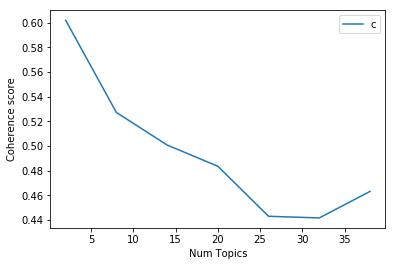

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

There is excellent coherence at the 5 topics I had used, so we will stay with that, in an effort to avoid being overly selective.

## A (Quasi) Supervised Approach

### Bag of Words

#### BoW with SKLearn CountVectorizer

In [72]:
#Setting additional stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'databasejava', 'andcollaborate', 'toolsadditional', 'offhealthcare',
                               'includeproviding', 'workflowsmentor', 'forecastingvideo', 'areadatastax',
                               'learninghighly', 'data', 'science', 'big', 'spark', 'computer', 'software','engineering',
                               'research']))

In [73]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_text(text):
    # 1. Remove HTML
    soup = BeautifulSoup(text)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower() 
    words = tok.tokenize(lower_case)

    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = stop_words                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    
    return (" ".join(words)).strip()

In [74]:
# remove punctuation from the job titles first
#X['job_description'] = X['job_description'].apply(clean_text)
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_text(X['job_description'][i])

In [75]:
#split up for classification
y = X.job_class
X1 = X.job_description

In [76]:
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

vectorizer = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1, 1), max_df=.30, min_df=.10, max_features=None)
bow = vectorizer.fit_transform(X1)
print(vectorizer.get_feature_names())

['abilities', 'able', 'access', 'achieve', 'action', 'active', 'activities', 'additional', 'affirmative', 'age', 'agile', 'ai', 'analytic', 'analytical', 'analyze', 'apache', 'applicable', 'applicants', 'application', 'applied', 'apply', 'applying', 'approaches', 'appropriate', 'architecture', 'area', 'areas', 'around', 'art', 'artificial', 'assist', 'attention', 'available', 'aws', 'bachelor', 'background', 'basic', 'basis', 'benefits', 'better', 'bring', 'bs', 'candidate', 'candidates', 'capabilities', 'care', 'career', 'center', 'challenges', 'challenging', 'change', 'changing', 'citizenship', 'class', 'classification', 'clearly', 'client', 'clients', 'closely', 'cloud', 'code', 'coding', 'collaborate', 'collaboration', 'collaborative', 'com', 'committed', 'communicate', 'community', 'companies', 'competitive', 'computing', 'concepts', 'conduct', 'consideration', 'content', 'continuous', 'contribute', 'control', 'core', 'creating', 'creative', 'critical', 'cross', 'culture', 'curren

In [78]:
#Split into X_train and X_test now that BoW is complete.
X_train, X_test= train_test_split(bow, test_size=0.25, random_state=42)

### Models to test initial Bag of Words

In [79]:
start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.994954954954955

Test set score: 0.7419006479481641
Done in 0.29503917694091797 seconds


In [80]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9520720720720721

Test set score: 0.6879049676025918
Done in 0.6107287406921387 seconds


In [81]:
start = time.time()
clf = XGBClassifier()  
clf.fit(X_train,y_train)  
clf.predict(X_test)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
cross_val = cross_val_score(clf, X_train, y_train)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9520720720720721

Test set score: 0.6879049676025918
Cross Validation Score: [0.84913793 0.87365011 0.82844734]
Cross Validation Mean: 0.8504117929579449
Done in 37.26176905632019 seconds


The BoW did not perform well, even with a boosted model. 

### K Means

In [82]:
# Normalize the data.
X_norm = normalize(X_train)

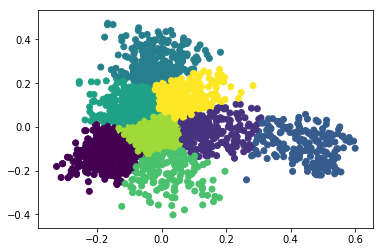

Done in 0.46999192237854004 seconds


In [83]:
start = time.time()
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in", end - start, "seconds")

Pretty nice clusters, with the exception of the variance of the top right green blob.

### KMeans Mini-Batch

In [84]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)
true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)

In [85]:
from time import time

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

print('Training set score:', rfc.score(X_train_norm, y_train))
print('\nTest set score:', rfc.score(X_test_norm, y_test))
t0 = time()
print("Done in %0.3fs" % (time() - t0))

Training set score: 0.9956756756756757

Test set score: 0.744060475161987
Done in 0.000s


In [86]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8223423423423424

Test set score: 0.714902807775378
Done in 0.22703003883361816 seconds


### LSA with BoW

In [87]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8223423423423424

Test set score: 0.714902807775378
Done in 0.21825599670410156 seconds


In [88]:
start = time.time()
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(bow)
terms = vectorizer.get_feature_names()
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")
end = time.time()
print("Done in", end - start, "seconds")

Concept 0:
understand
service
statistical
project
process
others
speech
may
ensure
cloud
 
Concept 1:
others
understand
speech
service
appropriate
duties
procedures
ensure
essential
care
 
Concept 2:
statistical
insights
analytical
statistics
predictive
methods
quantitative
project
mining
analytic
 
Concept 3:
enterprise
sales
apache
cloud
architecture
project
ensure
platform
aws
client
 
Concept 4:
care
health
may
security
education
staff
medical
healthcare
procedures
federal
 
Done in 5.819601058959961 seconds


### Bigrams

In [89]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X1, y, test_size=0.25, random_state=42)
count_vect_bigram = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1,2), max_df=.30, min_df=.1, max_features=100000)
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train_clean)
test_data_bow_bigram = count_vect_bigram.transform(X_test_clean)

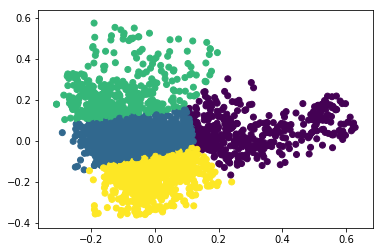

In [90]:
X_norm = normalize(train_data_bow_bigram)
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()

In [91]:
y.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [92]:
labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

Training set score: 0.9621621621621622

Test set score: 0.7041036717062635
Cross-Valid Bigram Fold Results are:  [0.67730496 0.72241993 0.725      0.72142857 0.75539568 0.75636364
 0.72       0.70181818 0.67636364 0.73357664]
Mean of Folds are =  0.718967124512766
Done in %0.3fs 7.456465005874634


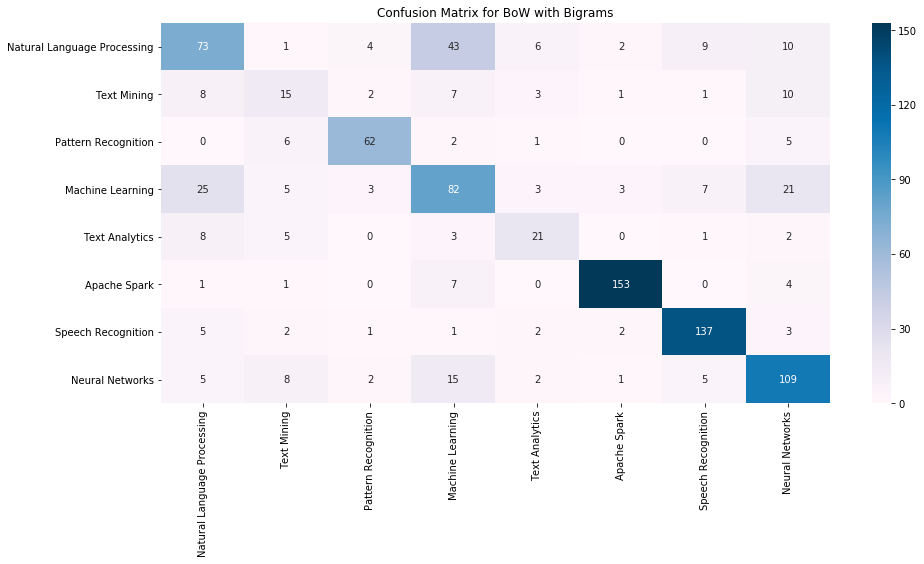

In [94]:
import time
start = time.time()

#Confusion matrix for Bigram BOW with Logistic Regression

lr = LogisticRegression()
lr.fit(train_data_bow_bigram,y_train)

print('Training set score:', lr.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', lr.score(test_data_bow_bigram, y_test_clean))

y_pred = lr.predict(test_data_bow_bigram)

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')
crs = cross_val_score(lr, train_data_bow_bigram, y_train_clean, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())
end = time.time()
print("Done in %0.3fs", end - start)
#conf = confusion_matrix(y_test_clean, bigram_pred, labels = labels)

#df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  #columns = [i for i in labels])
#plt.figure(figsize = (15,7))
#sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

Training set score: 0.9751351351351352

Test set score: 0.8736501079913607
Cross Validation Score: [0.87715517 0.8887689  0.85450597]
Cross Validation Mean: 0.8734766808905765
Done in 249.05548810958862 seconds


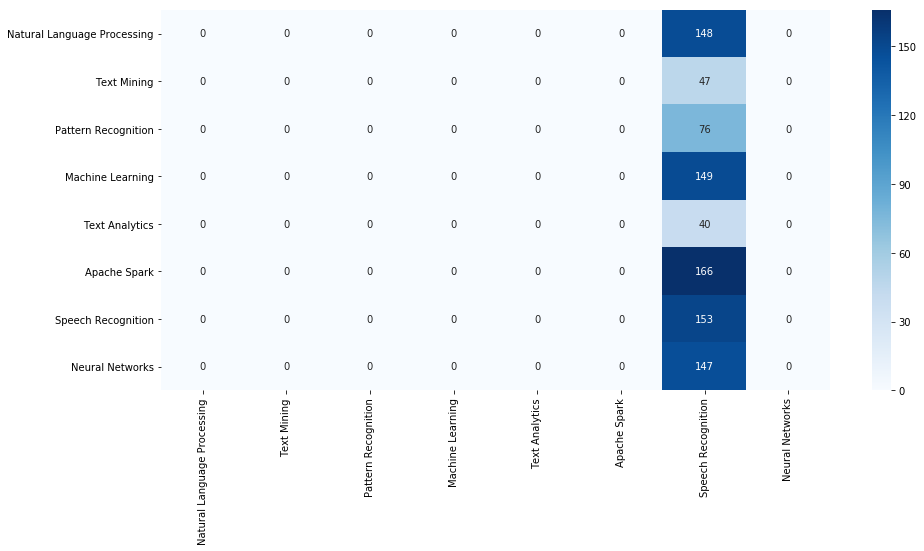

In [95]:
import time
start = time.time()

clf = XGBClassifier(silent=True, 
                    scale_pos_weight=1,
                    learning_rate=0.01,  
                    colsample_bytree = 0.4,
                    subsample = 0.85,
                    objective='binary:logistic', 
                    n_estimators=600, 
                    reg_alpha = 0.3,
                    max_depth=7, 
                    gamma=1)  
clf.fit(train_data_bow_bigram,y_train)
clf.predict(test_data_bow_bigram)
bigram_pred = clf.predict(test_data_bow_bigram.toarray())
print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")
conf = confusion_matrix(y_test_clean, bigram_pred, labels = labels)

df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

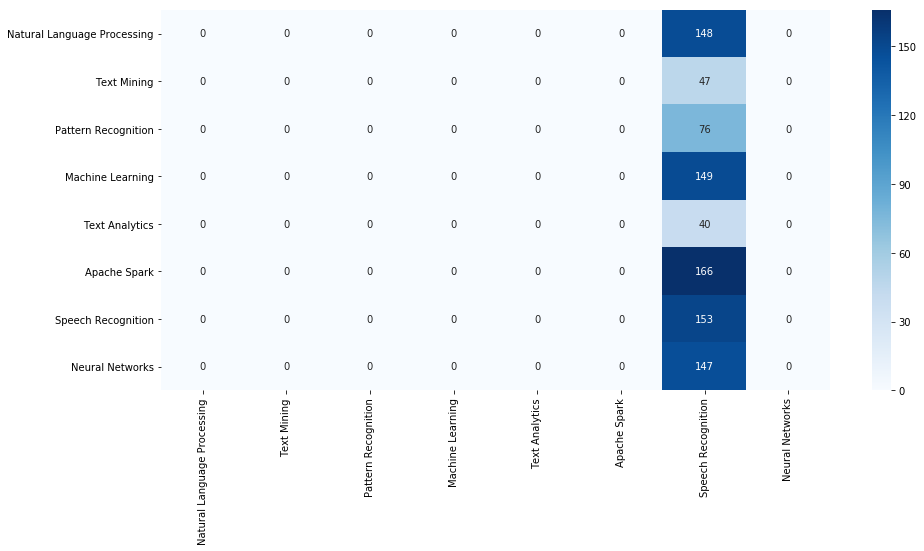

In [96]:
#Confusion matrix for XGB performance visualization on bigrams

labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

conf = confusion_matrix(y_test, bigram_pred, labels = labels)

df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

## TF-IDF Analysis

### Train and Test Sets


In [97]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)
tfidf.shape

(3701, 426)

In [98]:
X_train_tfidf, X_test_tfidf = train_test_split(tfidf, test_size=0.25, random_state=42)

In [99]:
import time

start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9974774774774775

Test set score: 0.7267818574514039
Done in 0.303314208984375 seconds


In [100]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)

print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8245045045045045

Test set score: 0.7159827213822895
Done in 0.1860649585723877 seconds


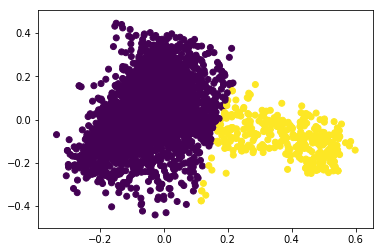

Done in %0.3fs 0.39400315284729004


In [101]:
start = time.time()
# Normalize the data.
X_normt = normalize(tfidf)
# Reduce it to two components.
X_pcat = PCA(2).fit_transform(X_normt.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pcat)

# Plot the solution.
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in %0.3fs", end - start)

In [102]:
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'mircosoft']))

In [103]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

vectorizer1 = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the job descriptions
                             min_df=10, # only use words that appear at least 10x
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

X_train_tfidf = vectorizer1.fit_transform(X_train_clean)
X_test_tfidf = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

Training set score: 0.9953153153153154

Test set score: 0.6911447084233261
Done in %0.3fs 1.965627908706665


In [104]:
start = time.time()
X = X1
X_norm_tfidf = normalize(vectorizer1.fit_transform(X))

true_k = 10
labels = y 
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

print("Clustering sparse data with %s" % km)
km.fit(X_norm_tfidf)
mini_labels = km.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm_tfidf, km.labels_, sample_size=5000))
end = time.time()
print("Done in %0.3fs", end - start)

Clustering sparse data with MiniBatchKMeans(batch_size=5000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
Homogeneity: 0.248
Completeness: 0.227
V-measure: 0.237
Adjusted Rand-Index: 0.157
Silhouette Coefficient: 0.016
Done in %0.3fs 5.179956436157227


In [105]:
len(y)

3701

In [106]:
len(X1)

3701

In [107]:
len(mini_labels)

3701

In [108]:
mini_labels.shape

(3701,)

In [109]:
df['MiniBatchLabels'] = mini_labels

ValueError: Length of values does not match length of index

In [ ]:
for label in set(mini_labels):
    print('Cluster: %d' % label)
    print(df[df.MiniBatchLabels == label].groupby('job_class').count())
    print('')

In [ ]:
#Let's check Cluster 0 - the largest
shuffle(df[df.MiniBatchLabels == 0]).head(10)

In [ ]:
#Let's check Cluster 1
shuffle(df[df.MiniBatchLabels == 1]).head(10)

In [ ]:
#Cluster 2
shuffle(df[df.MiniBatchLabels == 2]).head(10)

### LSA with TF-IDF

In [ ]:
print("Number of features: %d" % X_train_tfidf.get_shape()[1])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to about 10% of the original.
svd= TruncatedSVD(2100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of job descriptions our solution considers similar, for the first five identified topics
jobs_by_component=pd.DataFrame(X_train_lsa, index=list(X_train))
for i in range(5):
    print('Component {}:'.format(i))
    print(jobs_by_component.loc[:,i].sort_values(ascending=False)[0:10])
import time
print(time.time())

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(tfidf)
terms = vectorizer.get_feature_names()

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

In [ ]:
#Try a GBM classifier here, using TF-IDF 

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
tfidf_pred = clf.predict(X_test_tfidf.toarray())

print('Training set score:', clf.score(X_train_tfidf.toarray(), y_train))
print('\nTest set score:', clf.score(X_test_tfidf.toarray(), y_test))

In [ ]:
#Confusion matrix for GBM performance visualization on TF-IDF

conf = confusion_matrix(y_test, tfidf_pred, labels = labels)

df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
X_train_tfidf.shape

In [ ]:
#LSA with Tf-idf
mlp = neural_network.MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic')
train = mlp.fit(X_train_lsa, y_train)
mlp_y_pred = mlp.predict(X_test_lsa)

print('Training set score:', mlp.score(X_train_lsa, y_train))
print('\nTest set score:', mlp.score(X_test_lsa, y_test))